### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


# A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [1]:
NCDC_DATA = pd.read_html("https://covid19.ncdc.gov.ng/report/")

NameError: name 'pd' is not defined

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


#  Importing libraries

In [3]:
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

## B - C External data and John Hopkins Data Repository

# Loading data

In [4]:
#external data

In [5]:
BUDG_DAT = pd.read_csv("Budget data.csv")
COVIDNG = pd.read_csv("covidnig.csv")
COVID_EXT = pd.read_csv("covid_external.csv")
REAL_GDP = pd.read_csv("realgdp.csv")

In [6]:
#daily data

In [7]:
DF_CONFIMED_DAILY = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

## Task 2 - View the data

In [8]:
DF_CONFIMED_DAILY

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [9]:
DF_RECOVERED_DAILY =pd.read_csv ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [10]:
DF_RECOVERED_DAILY

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
DF_DAILY_DEATHS = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

In [12]:
DF_DAILY_DEATHS

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


In [13]:
DF_CONFIMED_DAILY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


In [14]:
DF_CONFIMED_DAILY.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [15]:
DF_RECOVERED_DAILY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.4+ MB


In [16]:
DF_RECOVERED_DAILY.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
DF_DAILY_DEATHS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


In [18]:
DF_DAILY_DEATHS.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [19]:
#covid_data Nigeria

In [20]:
COVIDNG

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46
5,Rivers,"3,279",232,"2,987",60
6,Edo,"2,768",52,"2,603",113
7,Ogun,"2,382",174,"2,175",33
8,Kano,"2,032",198,"1,778",56
9,Delta,"1,843",57,"1,737",49


In [21]:
COVIDNG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [22]:
COVIDNG.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


## Task 3 - Data Cleaning and Preparation

In [23]:
labels = {"States Affected":"STATES", "No. of Cases (Lab Confirmed)": "LAB_CONFIRMED",
      "No. of Cases (on admission)":"ADMISSION", "No. Discharged":"DISCHARGED", "No. of Deaths":"DEATHS"}
COVIDNG = COVIDNG.rename(columns = labels, inplace = False)
COVIDNG.head()

,STATES,LAB_CONFIRMED,ADMISSION,DISCHARGED,DEATHS
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [24]:
BUDG_DAT.head() 


,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [25]:
COVID_EXT.head()


,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [26]:
REAL_GDP.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format.


Examples: * Convert to appropriate data type. * Rename the columns of the scraped data. * Remove comma(,) in numerical data * Extract daily data for Nigeria from the Global daily cases data
TODO A - Clean the scraped data

In [27]:
COVIDNG.describe()

,DEATHS
count,37.000000
mean,33.000000
std,41.797794
min,2.000000
25%,11.000000
50%,21.000000
75%,36.000000
max,236.000000


# Cleaning data continues

removing commas and converting data to numeric

In [28]:


COVIDNG = COVIDNG.replace(",", "" , regex=True)

In [29]:
t = COVIDNG[['LAB_CONFIRMED', 'ADMISSION', 'DISCHARGED']].columns
COVIDNG[t] = COVIDNG[t].apply(pd.to_numeric,errors='coerce')

In [30]:
COVIDNG

,STATES,LAB_CONFIRMED,ADMISSION,DISCHARGED,DEATHS
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


# Checking states with the highest number of lab confirmed, admmision, discharged, and death

In [31]:
def get_keys(d):
  for i in d.keys():
    if d[i] == max(d.values()):return i

  return False

In [32]:

groups_conf = COVIDNG.groupby('STATES')['LAB_CONFIRMED'].sum()

print('The state with the highest lab_confirmed cases:')
print(get_keys(dict(groups_conf)))
print("=="*30)




group_admmiss = COVIDNG.groupby('STATES')['ADMISSION'].sum()
print('The state with the highest patient admission:')
print(get_keys(dict(group_admmiss)))
print("=="*30)



group_disch = COVIDNG.groupby('STATES')['DISCHARGED'].sum()
print('The state with the highest discharged patients:')
print(get_keys(dict(group_disch)))
print("=="*30)




group_deaths = COVIDNG.groupby('STATES')['DEATHS'].sum()
print('The state with the highest deaths:')
print(get_keys(dict(group_deaths)))

The state with the highest lab_confirmed cases:
Lagos
The state with the highest patient admission:
FCT
The state with the highest discharged patients:
Lagos
The state with the highest deaths:
Lagos


In [33]:
#checking null values

In [34]:



print(COVIDNG.isnull().values.any())
print(BUDG_DAT.isnull().values.any())
print(COVID_EXT.isnull().values.any())
print(REAL_GDP.isnull().values.any())  




 


False
False
False
False


In [35]:
DF_CONFIMED_DAILY.set_index("Country/Region", inplace = True)
DF_RECOVERED_DAILY.set_index("Country/Region", inplace = True)
DF_DAILY_DEATHS.set_index("Country/Region", inplace = True)

In [36]:
DF_RECOVERED_DAILY.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
DF_CONFIMED_DAILY = DF_CONFIMED_DAILY.drop(['Province/State', 'Lat', 'Long'], axis=1, errors='ignore')

In [38]:
CONFIRMED_NG = DF_CONFIMED_DAILY.groupby('Country/Region').sum().loc['Nigeria']


In [39]:
CONFIRMED_NG.head()

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Nigeria, dtype: int64

In [40]:
CONFIRMED_NG = CONFIRMED_NG.to_frame().reset_index()
CONFIRMED_NG

,index,Nigeria
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
1138,3/5/23,266598
1139,3/6/23,266598
1140,3/7/23,266598
1141,3/8/23,266598


In [41]:
CONFIRMED_NG.columns = ['Date', 'Cases']
CONFIRMED_NG['Date'] = pd.to_datetime(CONFIRMED_NG['Date'])


In [42]:
CONFIRMED_NG



,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
1138,2023-03-05,266598
1139,2023-03-06,266598
1140,2023-03-07,266598
1141,2023-03-08,266598


In [43]:
with pd.ExcelWriter ('output.xlsx') as writer:
    CONFIRMED_NG.to_excel(writer, sheet_name = 'Sheet_1')

In [44]:
DF_RECOVERED_DAILY = DF_RECOVERED_DAILY.drop(['Province/State', 'Lat', 'Long'], axis=1, errors='ignore')

In [45]:
RECOVERED_NG = DF_RECOVERED_DAILY.groupby('Country/Region').sum().loc['Nigeria']
RECOVERED_NG = RECOVERED_NG.to_frame().reset_index()
RECOVERED_NG.columns = ['Date', 'Cases']
RECOVERED_NG['Date'] = pd.to_datetime(RECOVERED_NG['Date'])




In [46]:

RECOVERED_NG

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
1138,2023-03-05,0
1139,2023-03-06,0
1140,2023-03-07,0
1141,2023-03-08,0


In [47]:
DF_DAILY_DEATHS = DF_DAILY_DEATHS.drop(['Province/State', 'Lat', 'Long'], axis=1, errors='ignore')
DEATH_NG = DF_DAILY_DEATHS.groupby('Country/Region').sum().loc['Nigeria']
DEATH_NG = DEATH_NG.to_frame().reset_index()
DEATH_NG.columns = ['Date', 'Cases']
DEATH_NG['Date'] = pd.to_datetime(DEATH_NG['Date'])

In [48]:
DEATH_NG

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
1138,2023-03-05,3155
1139,2023-03-06,3155
1140,2023-03-07,3155
1141,2023-03-08,3155


In [49]:
# Using the global_daily data to create a data frame of nigeria datasets and storing in NG_GLOBAL

NG_GLOBAL = []
for index, rows in DF_CONFIMED_DAILY.iterrows():
    if index == 'Nigeria':
        NG_GLOBAL.append(rows)
        
for index, rows in DF_RECOVERED_DAILY.iterrows():
    if index == "Nigeria":
        NG_GLOBAL.append(rows)
        
for index, rows in DF_DAILY_DEATHS.iterrows():
    if index == "Nigeria":
        NG_GLOBAL.append(rows)



NG_GLOBAL= pd.DataFrame(NG_GLOBAL)
NG_GLOBAL

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Nigeria,0,0,0,0,0,0,0,0,0,0,...,266593,266598,266598,266598,266598,266598,266598,266598,266598,266598
Nigeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Nigeria,0,0,0,0,0,0,0,0,0,0,...,3155,3155,3155,3155,3155,3155,3155,3155,3155,3155


In [50]:
#NG_GLOBAL = NG_GLOBAL.drop(["Province/State", "Lat", "Long"], axis = 1)
#NG_GLOBAL

In [51]:
INDEX = list(NG_GLOBAL.index)
INDEX[0] = "TOTALCONFIRMED_NG"
INDEX[1] = "TOTALRECOVERED_NG"
INDEX[2] = "TOTALDEATH_NG"
NG_GLOBAL.index = INDEX

In [52]:
INDEX

['TOTALCONFIRMED_NG', 'TOTALRECOVERED_NG', 'TOTALDEATH_NG']

In [53]:
NG_GLOBAL

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
TOTALCONFIRMED_NG,0,0,0,0,0,0,0,0,0,0,...,266593,266598,266598,266598,266598,266598,266598,266598,266598,266598
TOTALRECOVERED_NG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TOTALDEATH_NG,0,0,0,0,0,0,0,0,0,0,...,3155,3155,3155,3155,3155,3155,3155,3155,3155,3155


In [54]:
NG_GLOBAL_TRANSPOSED = NG_GLOBAL.T


In [55]:
NG_GLOBAL_TRANSPOSED.tail()

,TOTALCONFIRMED_NG,TOTALRECOVERED_NG,TOTALDEATH_NG
3/5/23,266598,0,3155
3/6/23,266598,0,3155
3/7/23,266598,0,3155
3/8/23,266598,0,3155
3/9/23,266598,0,3155


In [56]:
NGGT= NG_GLOBAL_TRANSPOSED
NGGT.head(50)

,TOTALCONFIRMED_NG,TOTALRECOVERED_NG,TOTALDEATH_NG
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
1/27/20,0,0,0
1/28/20,0,0,0
1/29/20,0,0,0
1/30/20,0,0,0
1/31/20,0,0,0


In [57]:
NGGT["TOTALCONFIRMED_NG"] = NGGT["TOTALCONFIRMED_NG"].astype(float)
NGGT["TOTALRECOVERED_NG"] = NGGT["TOTALRECOVERED_NG"].astype(float)
NGGT["TOTALDEATH_NG"] = NGGT["TOTALDEATH_NG"].astype(float)

Creating a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases 

### Difference in Government Budget percentage

In [58]:
BUDG_DAT.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [59]:
CHANGE_BUDG = []
for index, row in BUDG_DAT.iterrows():
    diff = row[1] - row[2]
    CHANGE_BUDG.append(diff)
    

BUDG_DAT["CHANGE_BUDG (Bn)"] = CHANGE_BUDG
BUDG_DAT.head()

,states,Initial_budget (Bn),Revised_budget (Bn),CHANGE_BUDG (Bn)
0,Abia,136.60,102.70,33.90
1,Adamawa,183.30,139.31,43.99
2,Akwa-Ibom,597.73,366.00,231.73
3,Anambra,137.10,112.80,24.30
4,Bauchi,167.20,128.00,39.20


In [60]:
BUDGETCHANAGE_PERC = []
for index, row in BUDG_DAT.iterrows():
    PERC = (row[3]/row[1]) * 100
    #perc2 = round(perc, 2)
    BUDGETCHANAGE_PERC.append(PERC)
    
BUDG_DAT["CHANGE_BDGPERC"] =  BUDGETCHANAGE_PERC
BUDG_DAT.tail()

,states,Initial_budget (Bn),Revised_budget (Bn),CHANGE_BUDG (Bn),CHANGE_BDGPERC
32,Sokoto,202.40,153.0,49.40,24.407115
33,Taraba,215.00,150.5,64.50,30.000000
34,Yobe,108.00,86.0,22.00,20.370370
35,Zamfara,188.50,127.3,61.20,32.466844
36,FCT,278.78,199.0,79.78,28.617548


# Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary.


We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary
TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [61]:
COVIDNG.head()

,STATES,LAB_CONFIRMED,ADMISSION,DISCHARGED,DEATHS
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46


## TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

Text(0.5, 1.0, 'TOP 10  STATES CONFIRMED COVID CASES.')

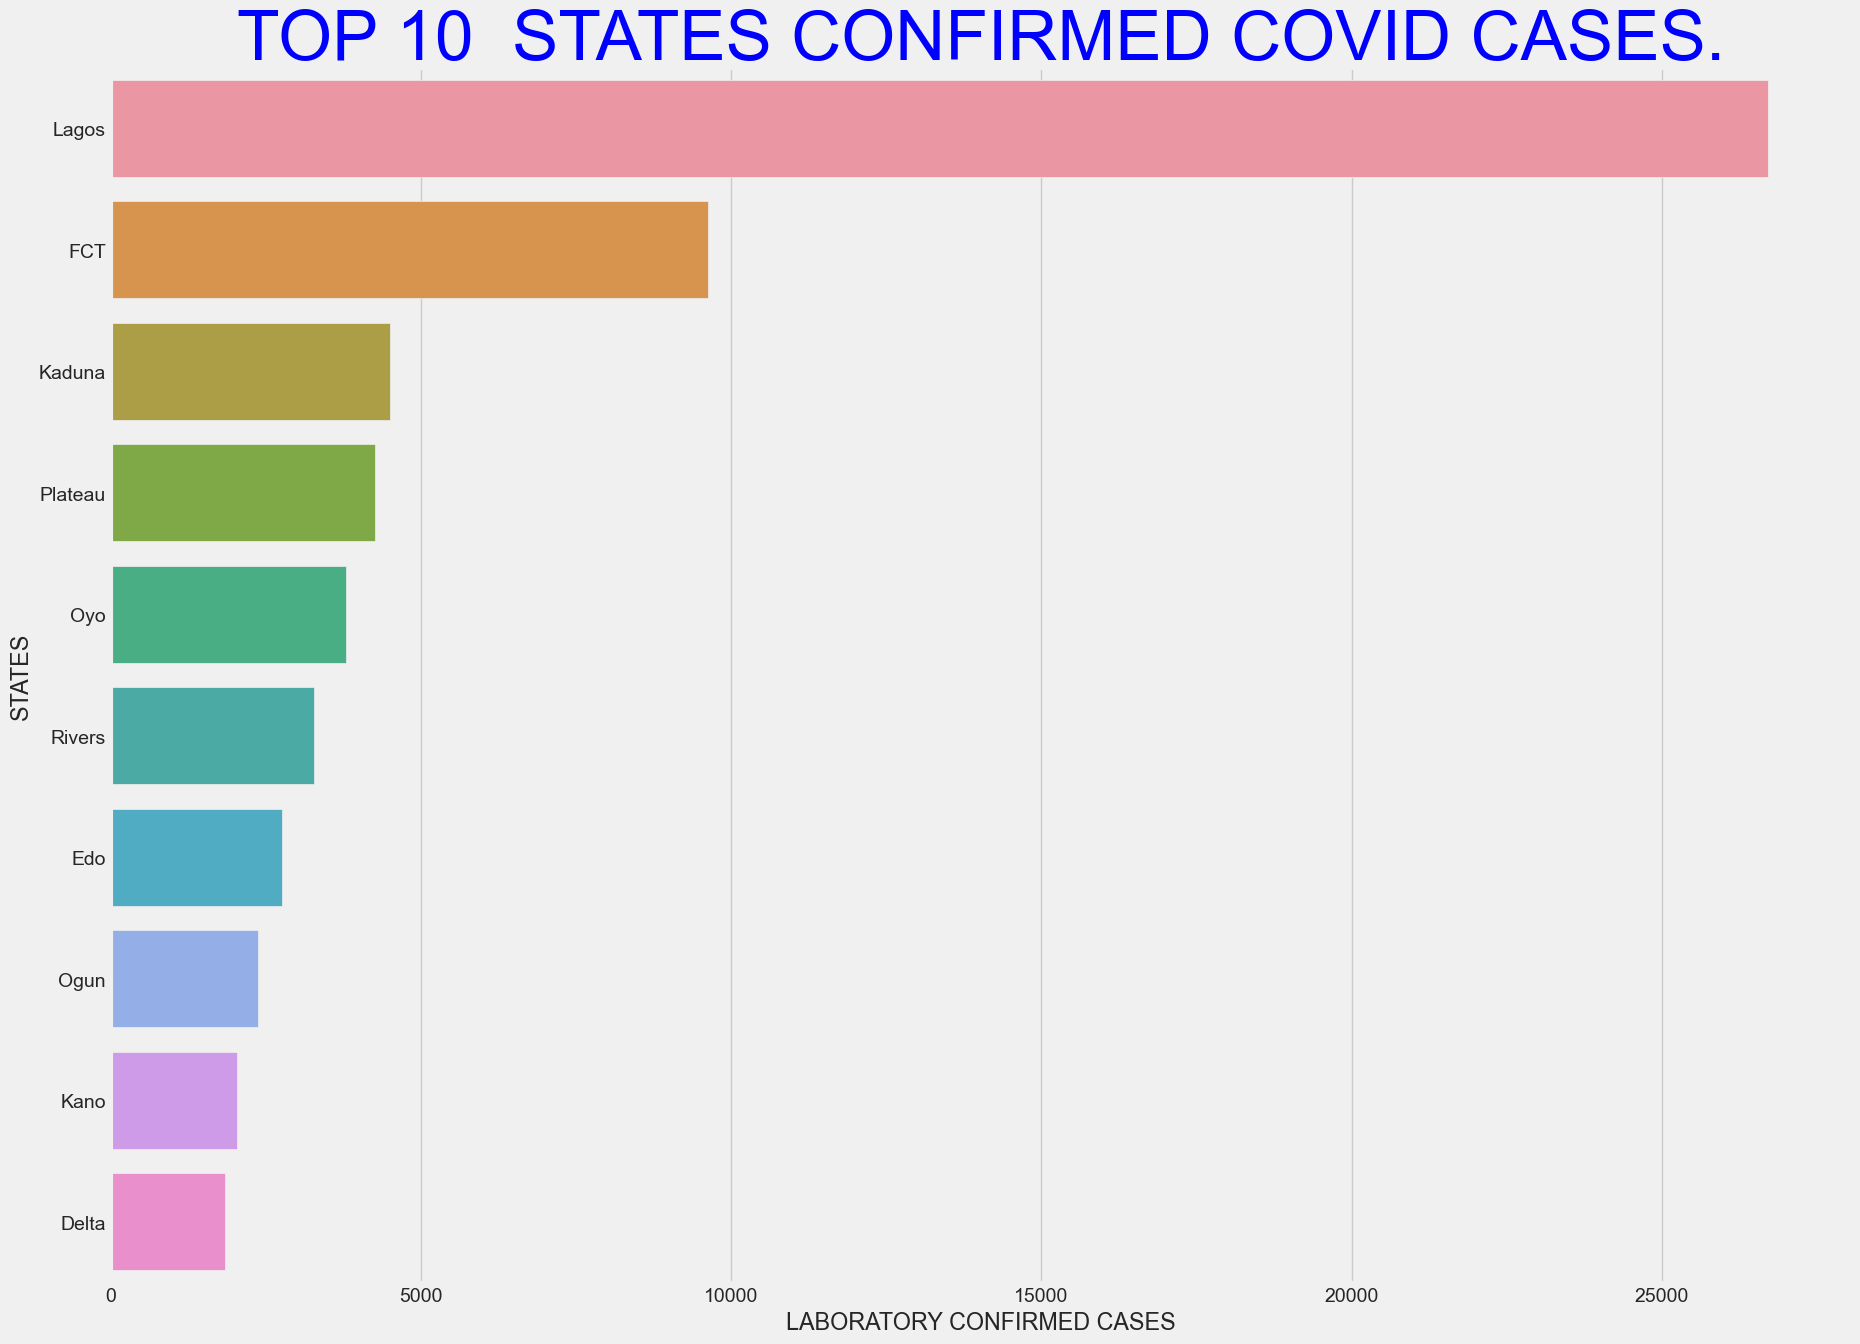

In [62]:
fig,ax=plt.subplots(figsize=(20,15))
data = COVIDNG.nlargest(10, "LAB_CONFIRMED")
rc('font', **{'family': 'Bahnschrift',"size":20})
ax = sns.barplot(x="LAB_CONFIRMED", y="STATES", data=data[["STATES", "LAB_CONFIRMED"]])
ax.set_xlabel('LABORATORY CONFIRMED CASES')
plt.title(label= "TOP 10  STATES CONFIRMED COVID CASES.", fontsize=50, color="blue")

##### Lagos has the largest number of confirmed COVID-19 cases followed by the FCT and Kaduna. The top 10 largest confirmed
##### cases are shown in the plot above


## TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

Text(0.5, 1.0, 'TOP 10  STATES OF DISCHARGED CASES.')

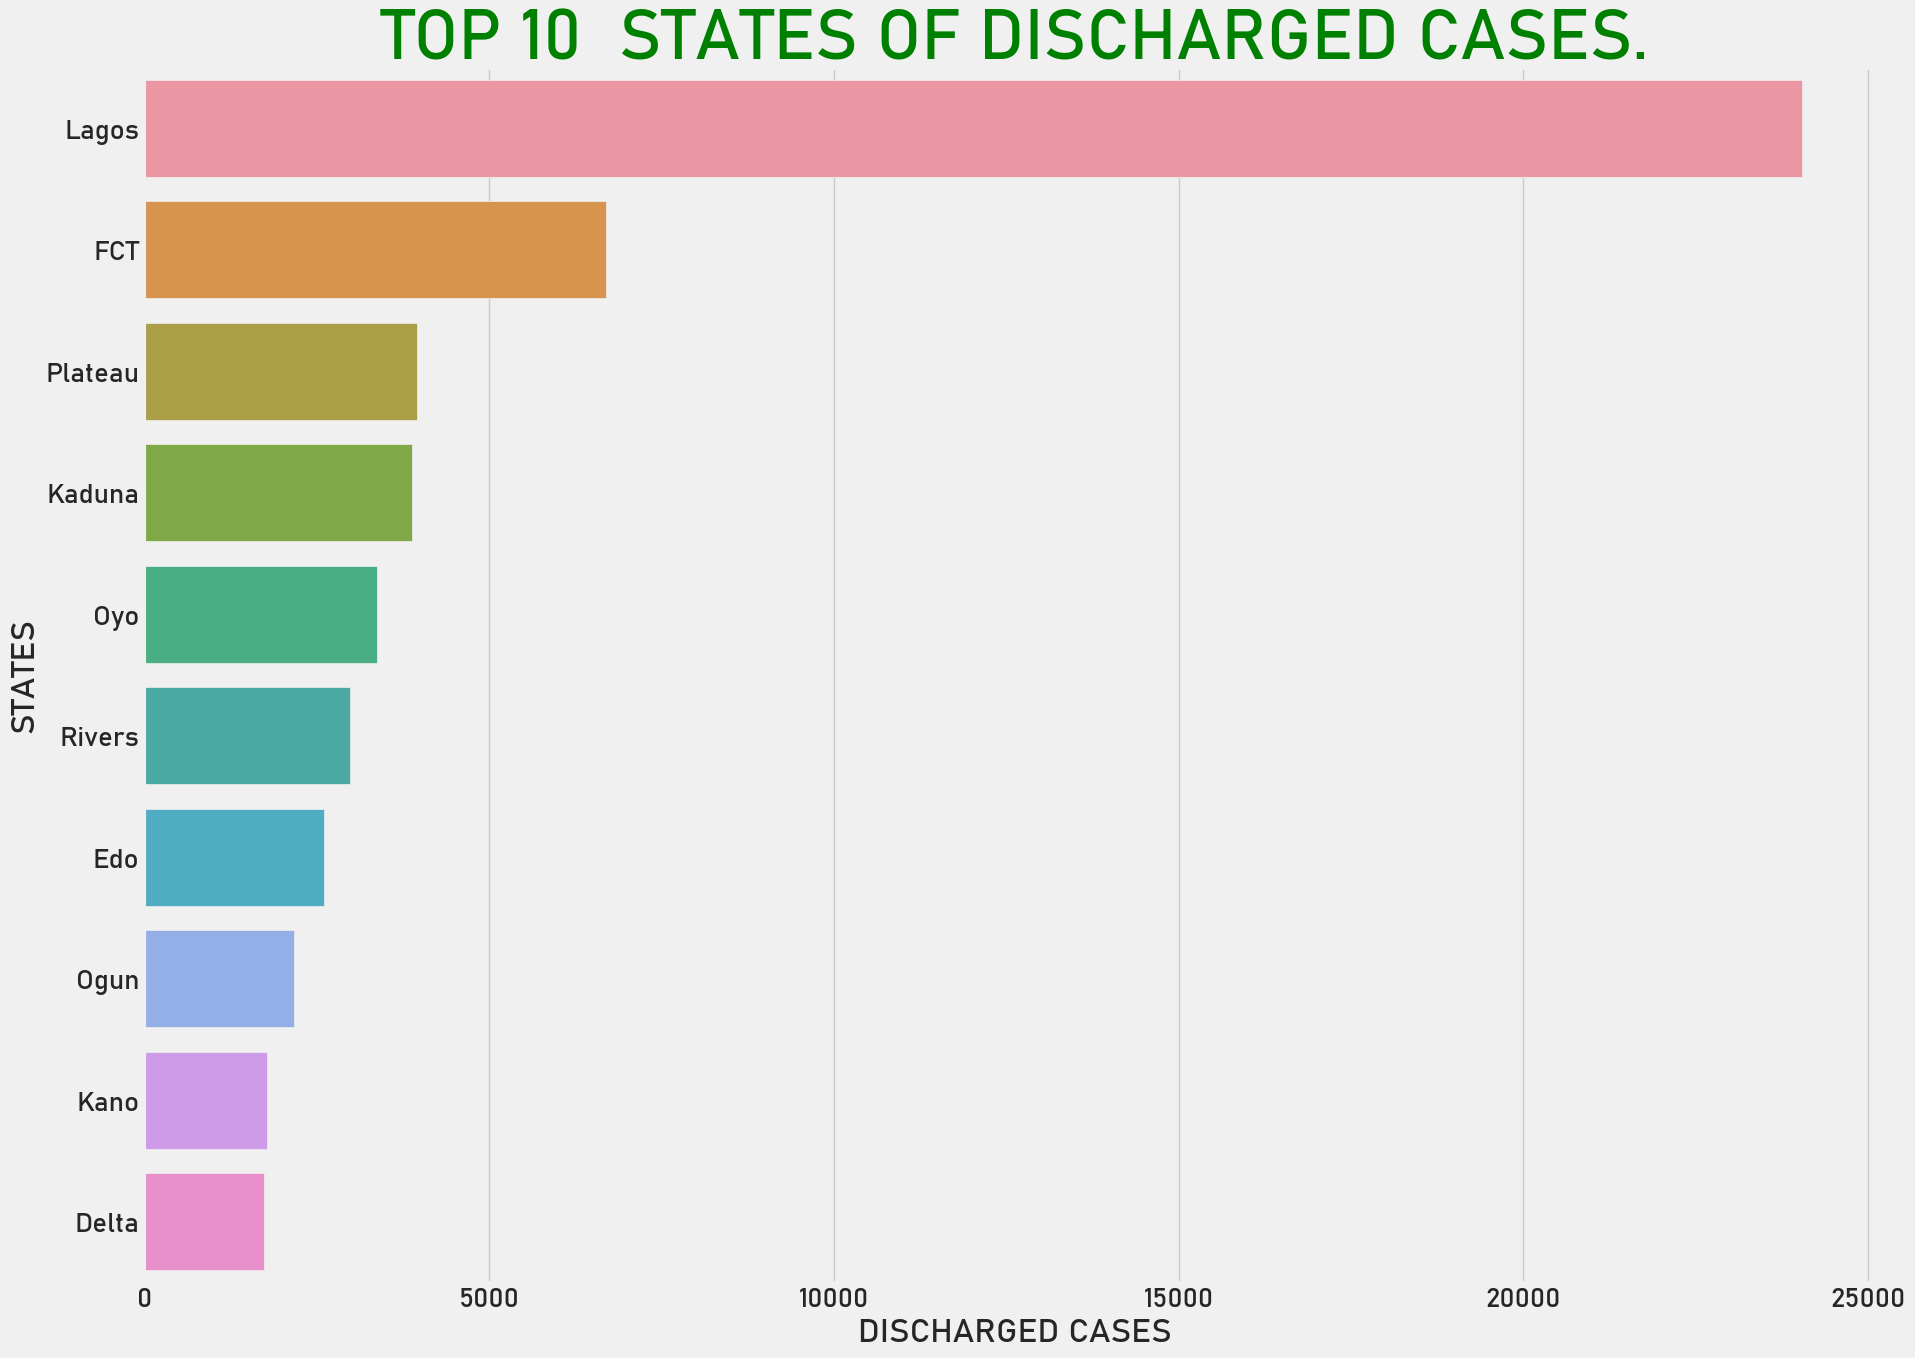

In [63]:
fig,ax=plt.subplots(figsize=(20,15))
data = COVIDNG.nlargest(10, "DISCHARGED")
ax = sns.barplot(x="DISCHARGED", y="STATES", data=data[["STATES", "DISCHARGED"]])
ax.set_xlabel('DISCHARGED CASES')
plt.title(label= "TOP 10  STATES OF DISCHARGED CASES.", fontsize=50, color="GREEN")

##### Lagos has the largest number of Discharged COVID-19 cases followed by the FCT , plateau etc. Plateau has a high death rate might be because of other factors like transportation , vulnerabilty index, age, e.t.c   


## TODO D - Plot the top 10 Death cases

Text(0.5, 1.0, 'TOP 10  STATES OF DEATH COVID CASES.')

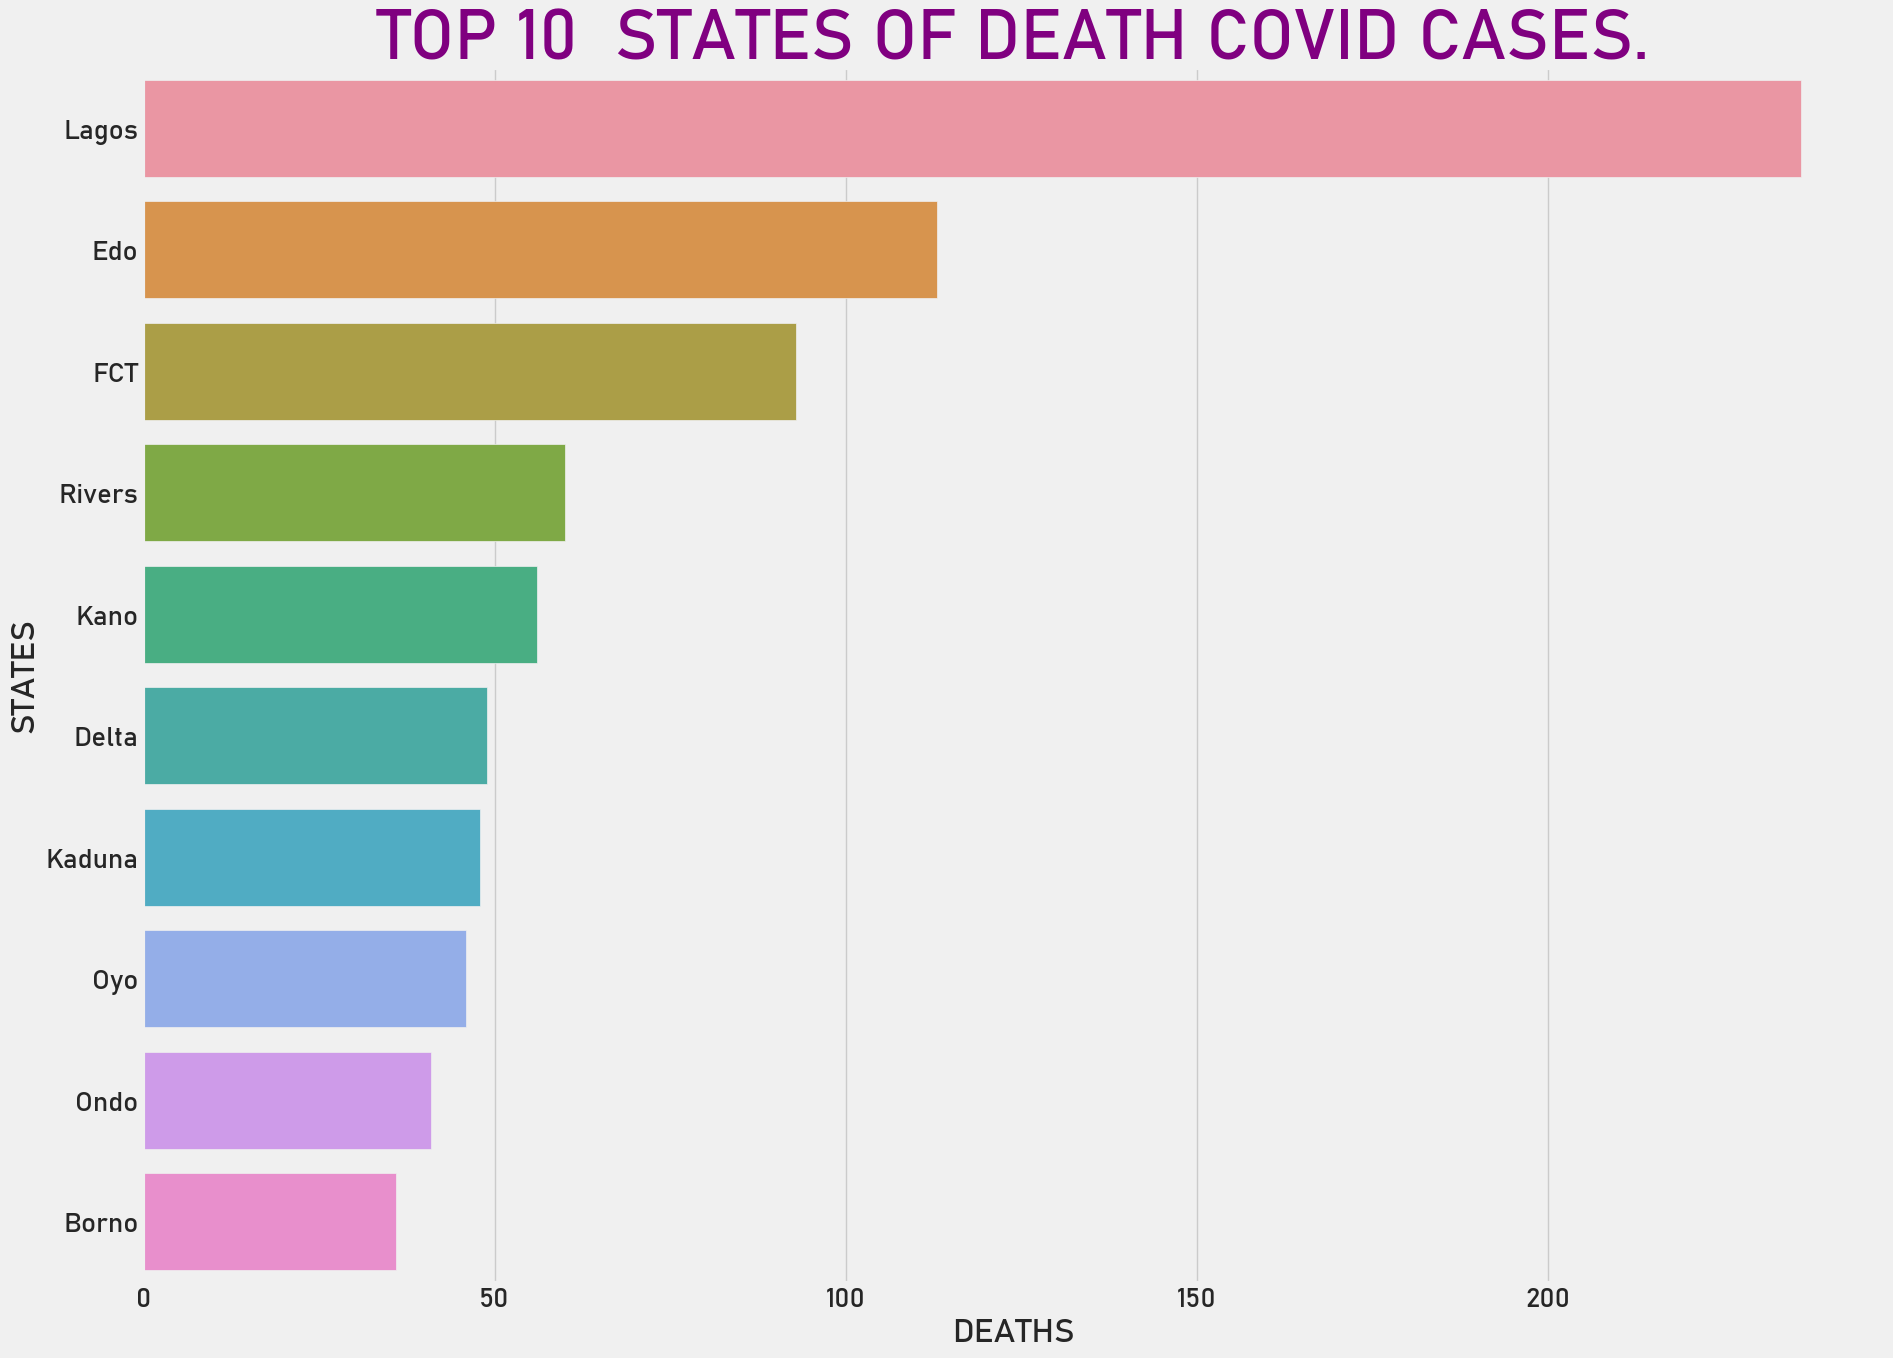

In [64]:
fig,ax=plt.subplots(figsize=(20,15))
data = COVIDNG.nlargest(10, "DEATHS")
ax = sns.barplot(x="DEATHS", y="STATES", data=data[["STATES", "DEATHS"]])
ax.set_xlabel('DEATHS')
plt.title(label= "TOP 10  STATES OF DEATH COVID CASES.", fontsize=50, color="PURPLE")

##### Lagos has the largest number of death COVID-19 cases followed by Edo, FCT etc. The top 10 largest confirmed
##### cases are shown in the plot above


In [65]:
NG_GLOBAL.dtypes

1/22/20    int64
1/23/20    int64
1/24/20    int64
1/25/20    int64
1/26/20    int64
           ...  
3/5/23     int64
3/6/23     int64
3/7/23     int64
3/8/23     int64
3/9/23     int64
Length: 1143, dtype: object

In [66]:
NGGT

,TOTALCONFIRMED_NG,TOTALRECOVERED_NG,TOTALDEATH_NG
1/22/20,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0
...,...,...,...
3/5/23,266598.0,0.0,3155.0
3/6/23,266598.0,0.0,3155.0
3/7/23,266598.0,0.0,3155.0
3/8/23,266598.0,0.0,3155.0


In [67]:
INFECTION_DAILY = NGGT["TOTALCONFIRMED_NG"].diff()
NGGT["INFECTION_DAILY"] = INFECTION_DAILY  

In [68]:
INFECTION_DAILY

1/22/20    NaN
1/23/20    0.0
1/24/20    0.0
1/25/20    0.0
1/26/20    0.0
          ... 
3/5/23     0.0
3/6/23     0.0
3/7/23     0.0
3/8/23     0.0
3/9/23     0.0
Name: TOTALCONFIRMED_NG, Length: 1143, dtype: float64

In [69]:
INFECTION_DAILY = INFECTION_DAILY.to_frame().reset_index()
INFECTION_DAILY.columns = ['Date', 'Cases']
INFECTION_DAILY['Date'] = pd.to_datetime(INFECTION_DAILY['Date'])

In [70]:
INFECTION_DAILY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1143 non-null   datetime64[ns]
 1   Cases   1142 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.0 KB


In [71]:
RECOVERED_DAILY = NGGT["TOTALRECOVERED_NG"].diff()
NGGT["RECOVERED_DAILY"] = RECOVERED_DAILY 

In [72]:
RECOVERED_DAILY = RECOVERED_DAILY.to_frame().reset_index()
RECOVERED_DAILY.columns = ['Date', 'Cases']

In [73]:
RECOVERED_DAILY['Date'] = pd.to_datetime(RECOVERED_DAILY['Date'])

In [74]:
RECOVERED_DAILY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1143 non-null   datetime64[ns]
 1   Cases   1142 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.0 KB


In [75]:
RECOVERED_DAILY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1143 non-null   datetime64[ns]
 1   Cases   1142 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.0 KB


In [76]:
DEATH_DAILY = NGGT["TOTALDEATH_NG"].diff()
NGGT["DEATH_DAILY"] = DEATH_DAILY 

In [77]:
DEATH_DAILY = DEATH_DAILY.to_frame().reset_index()
DEATH_DAILY.columns = ['Date', 'Cases']


In [78]:
DEATH_DAILY['Date'] = pd.to_datetime(DEATH_DAILY['Date'])

In [79]:
DEATH_DAILY

,Date,Cases
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
...,...,...
1138,2023-03-05,0.0
1139,2023-03-06,0.0
1140,2023-03-07,0.0
1141,2023-03-08,0.0


In [80]:
NGGT.head(50)

,TOTALCONFIRMED_NG,TOTALRECOVERED_NG,TOTALDEATH_NG,INFECTION_DAILY,RECOVERED_DAILY,DEATH_DAILY
1/22/20,0.0,0.0,0.0,NaN,NaN,NaN
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0
1/27/20,0.0,0.0,0.0,0.0,0.0,0.0
1/28/20,0.0,0.0,0.0,0.0,0.0,0.0
1/29/20,0.0,0.0,0.0,0.0,0.0,0.0
1/30/20,0.0,0.0,0.0,0.0,0.0,0.0
1/31/20,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
NGGT.head(38)

,TOTALCONFIRMED_NG,TOTALRECOVERED_NG,TOTALDEATH_NG,INFECTION_DAILY,RECOVERED_DAILY,DEATH_DAILY
1/22/20,0.0,0.0,0.0,NaN,NaN,NaN
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0
1/27/20,0.0,0.0,0.0,0.0,0.0,0.0
1/28/20,0.0,0.0,0.0,0.0,0.0,0.0
1/29/20,0.0,0.0,0.0,0.0,0.0,0.0
1/30/20,0.0,0.0,0.0,0.0,0.0,0.0
1/31/20,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
NGGT.reset_index(inplace=True)

In [83]:
NGGT.head(37)

,index,TOTALCONFIRMED_NG,TOTALRECOVERED_NG,TOTALDEATH_NG,INFECTION_DAILY,RECOVERED_DAILY,DEATH_DAILY
0,1/22/20,0.0,0.0,0.0,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0
6,1/28/20,0.0,0.0,0.0,0.0,0.0,0.0
7,1/29/20,0.0,0.0,0.0,0.0,0.0,0.0
8,1/30/20,0.0,0.0,0.0,0.0,0.0,0.0
9,1/31/20,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
NGGT = NGGT.drop(NGGT.index[range(37)])




In [85]:
NGGT

,index,TOTALCONFIRMED_NG,TOTALRECOVERED_NG,TOTALDEATH_NG,INFECTION_DAILY,RECOVERED_DAILY,DEATH_DAILY
37,2/28/20,1.0,0.0,0.0,1.0,0.0,0.0
38,2/29/20,1.0,0.0,0.0,0.0,0.0,0.0
39,3/1/20,1.0,0.0,0.0,0.0,0.0,0.0
40,3/2/20,1.0,0.0,0.0,0.0,0.0,0.0
41,3/3/20,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1138,3/5/23,266598.0,0.0,3155.0,0.0,0.0,0.0
1139,3/6/23,266598.0,0.0,3155.0,0.0,0.0,0.0
1140,3/7/23,266598.0,0.0,3155.0,0.0,0.0,0.0
1141,3/8/23,266598.0,0.0,3155.0,0.0,0.0,0.0


In [86]:
NGGT.head()

,index,TOTALCONFIRMED_NG,TOTALRECOVERED_NG,TOTALDEATH_NG,INFECTION_DAILY,RECOVERED_DAILY,DEATH_DAILY
37,2/28/20,1.0,0.0,0.0,1.0,0.0,0.0
38,2/29/20,1.0,0.0,0.0,0.0,0.0,0.0
39,3/1/20,1.0,0.0,0.0,0.0,0.0,0.0
40,3/2/20,1.0,0.0,0.0,0.0,0.0,0.0
41,3/3/20,1.0,0.0,0.0,0.0,0.0,0.0


In [87]:
NGGT.rename(columns = {'index':'DATE'}, inplace = True)

In [88]:
NGGT.head()

,DATE,TOTALCONFIRMED_NG,TOTALRECOVERED_NG,TOTALDEATH_NG,INFECTION_DAILY,RECOVERED_DAILY,DEATH_DAILY
37,2/28/20,1.0,0.0,0.0,1.0,0.0,0.0
38,2/29/20,1.0,0.0,0.0,0.0,0.0,0.0
39,3/1/20,1.0,0.0,0.0,0.0,0.0,0.0
40,3/2/20,1.0,0.0,0.0,0.0,0.0,0.0
41,3/3/20,1.0,0.0,0.0,0.0,0.0,0.0


In [89]:
NGGT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 37 to 1142
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DATE               1106 non-null   object 
 1   TOTALCONFIRMED_NG  1106 non-null   float64
 2   TOTALRECOVERED_NG  1106 non-null   float64
 3   TOTALDEATH_NG      1106 non-null   float64
 4   INFECTION_DAILY    1106 non-null   float64
 5   RECOVERED_DAILY    1106 non-null   float64
 6   DEATH_DAILY        1106 non-null   float64
dtypes: float64(6), object(1)
memory usage: 60.6+ KB


In [90]:
#plt.figure(figsize = (30,30))
#plt.plot(NGGT.loc[:,"DATE"],NGGT.loc[:,"DEATH_NG"], color = "blue", label = "CASES")


In [91]:
NGGT['DATE'] = pd.to_datetime(NGGT['DATE'])

In [92]:
NGGT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 37 to 1142
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE               1106 non-null   datetime64[ns]
 1   TOTALCONFIRMED_NG  1106 non-null   float64       
 2   TOTALRECOVERED_NG  1106 non-null   float64       
 3   TOTALDEATH_NG      1106 non-null   float64       
 4   INFECTION_DAILY    1106 non-null   float64       
 5   RECOVERED_DAILY    1106 non-null   float64       
 6   DEATH_DAILY        1106 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 60.6 KB


In [93]:
RECOVERED_NG

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
1138,2023-03-05,0
1139,2023-03-06,0
1140,2023-03-07,0
1141,2023-03-08,0


## TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

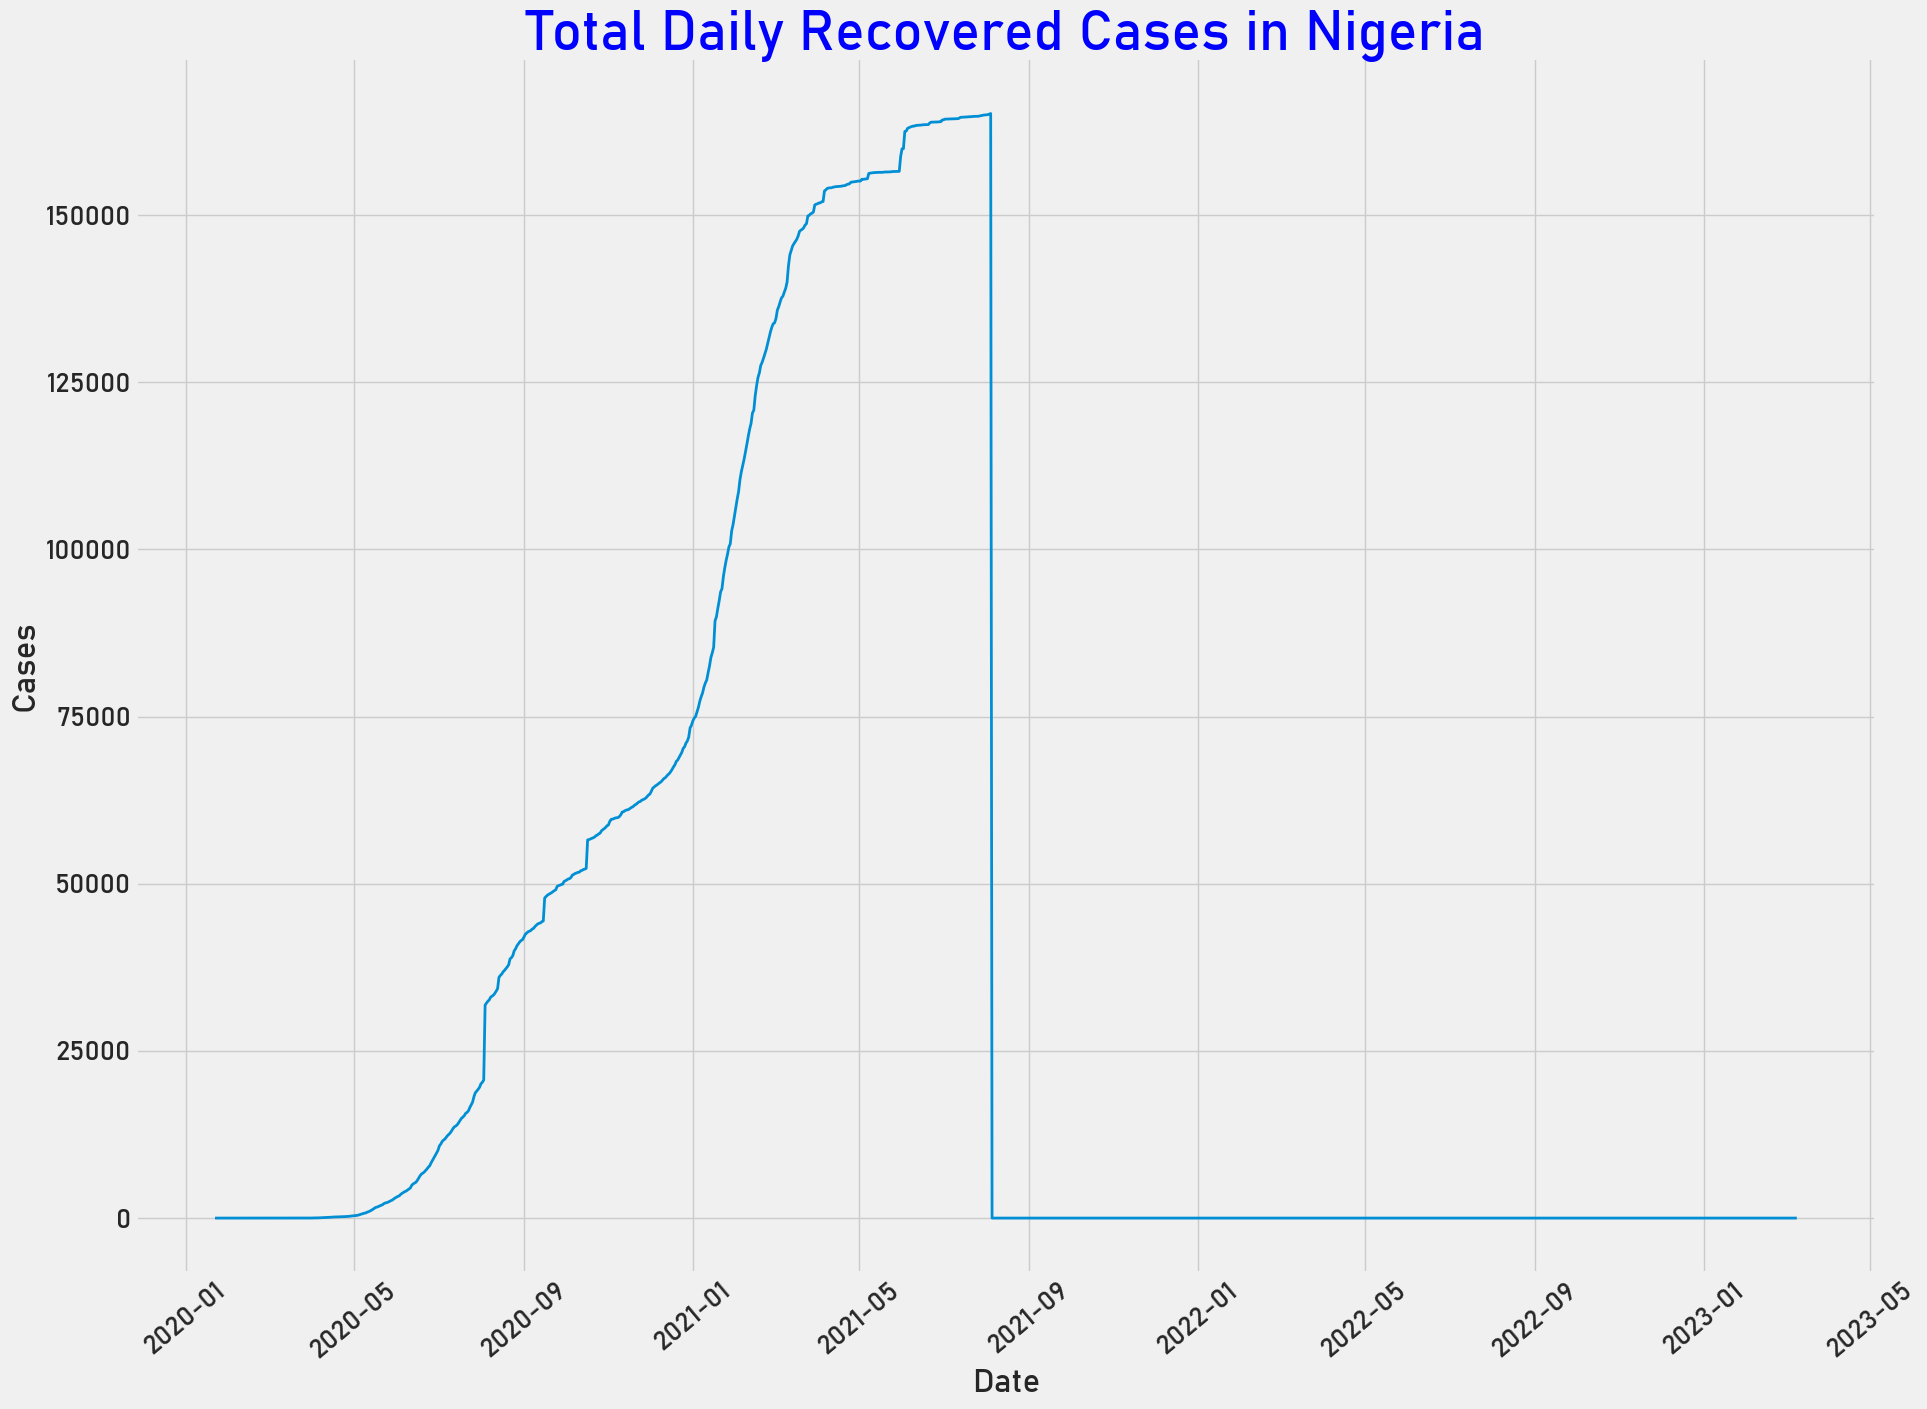

In [94]:
fig,ax=plt.subplots(figsize=(20,15))
sns.lineplot(x="Date", y="Cases", data=RECOVERED_NG, lw = 2)
rc('font', **{'family': 'Showcard Gothic',"size":20})
plt.xticks(rotation=40)
plt.title('Total Daily Recovered Cases in Nigeria' ,fontsize = '40', color = 'blue')
plt.show()

## There is steep rise in the daily recovery record up till september 2021 and the record becomes flat. Might be due to no records or a decline in confirmed cases.

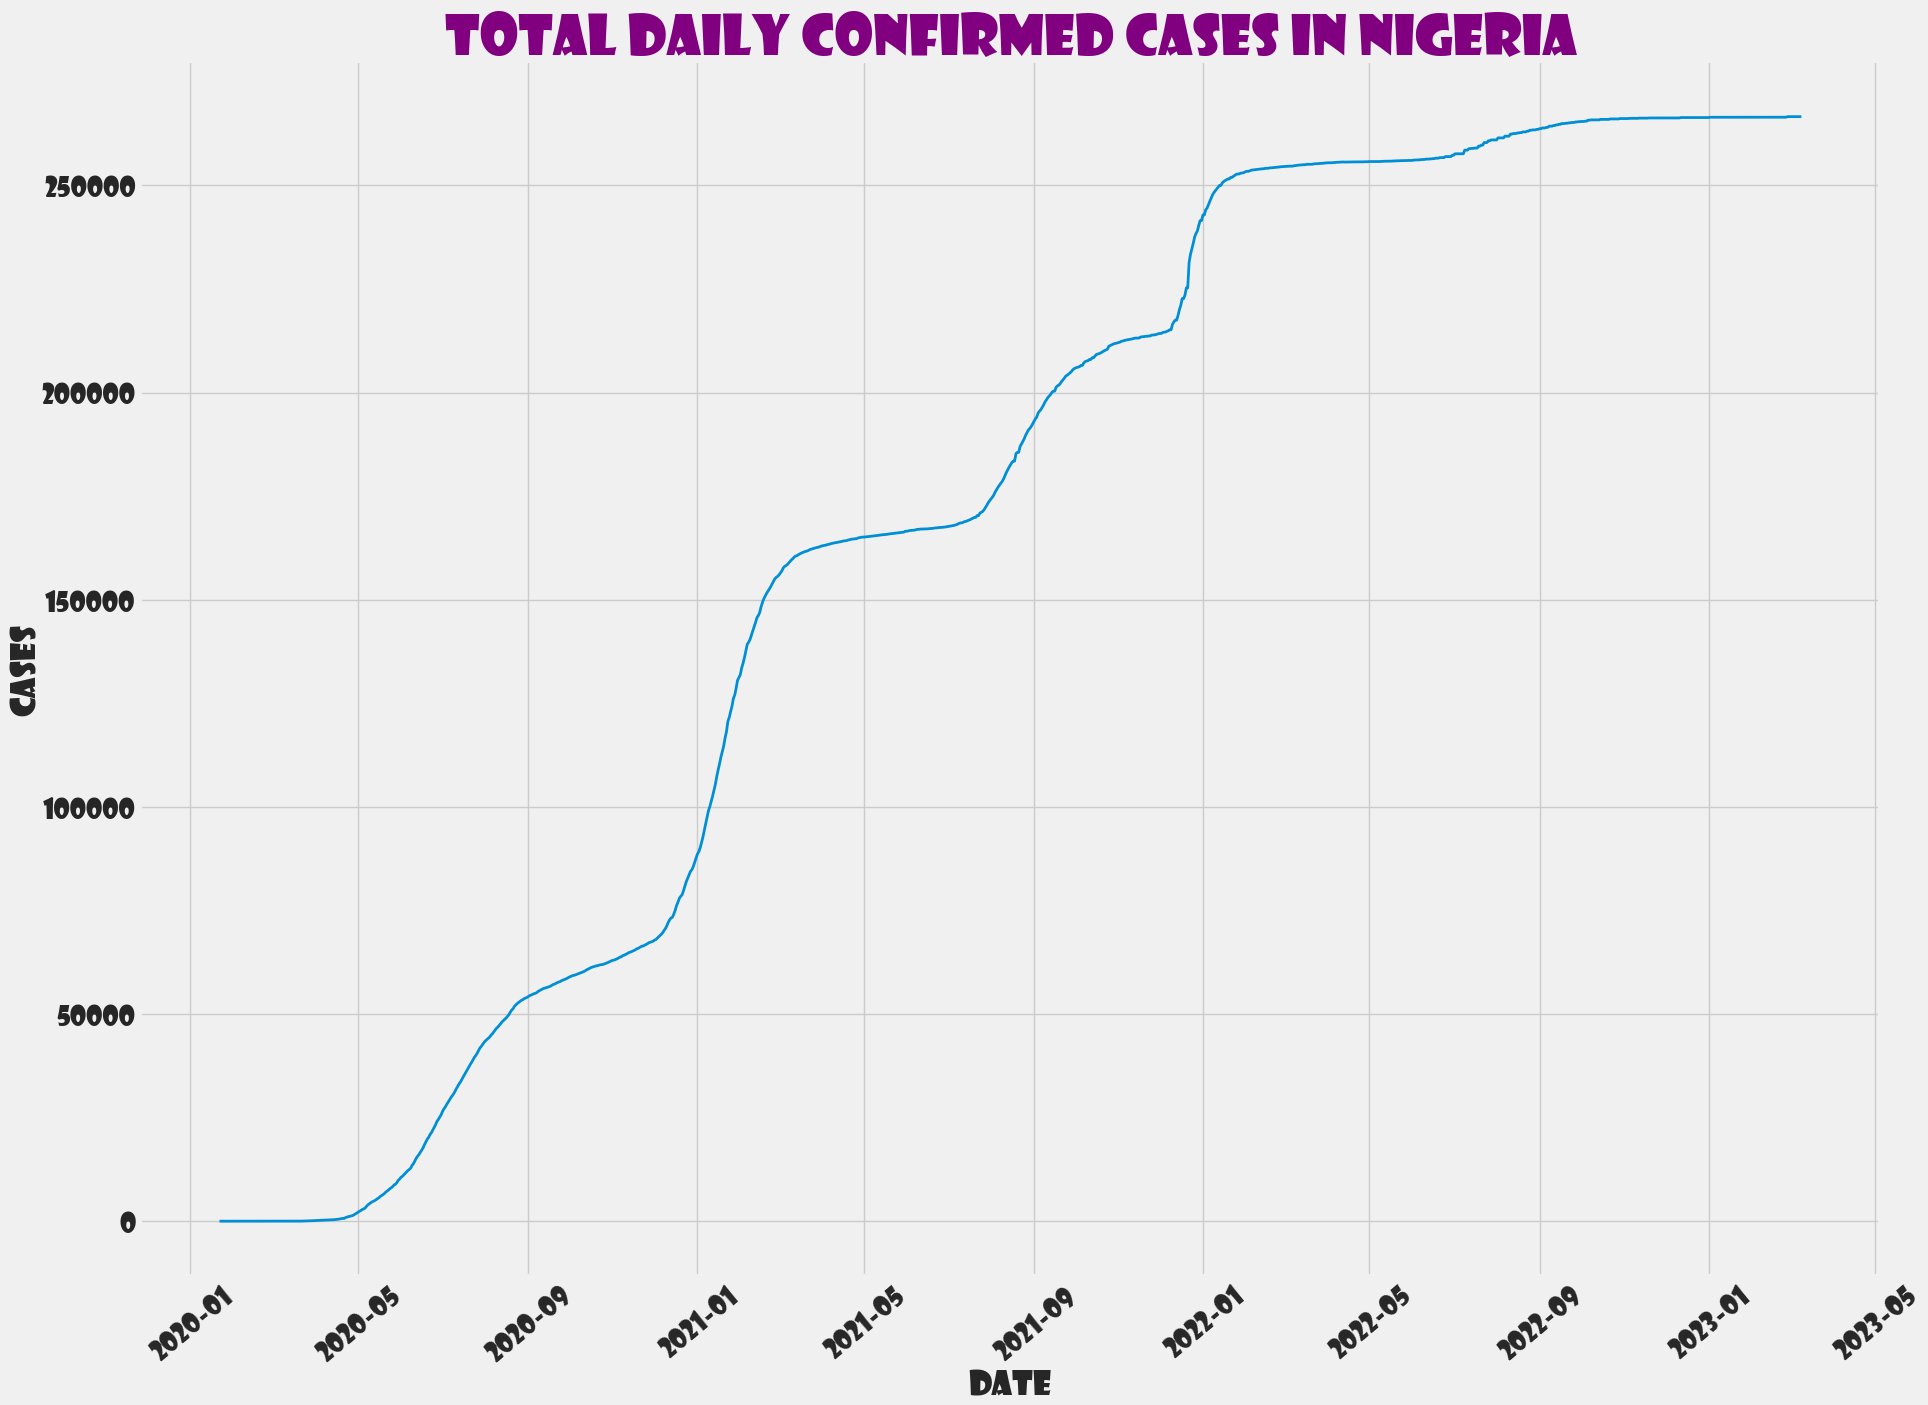

In [95]:
fig,ax=plt.subplots(figsize=(20,15))
sns.lineplot(x="Date", y="Cases", data=CONFIRMED_NG, lw = 2)
rc('font', **{'family': 'Showcard Gothic',"size":20})
plt.xticks(rotation=40)
plt.title('Total Daily Confirmed Cases in Nigeria',fontsize = '40', color = 'purple')
plt.show()

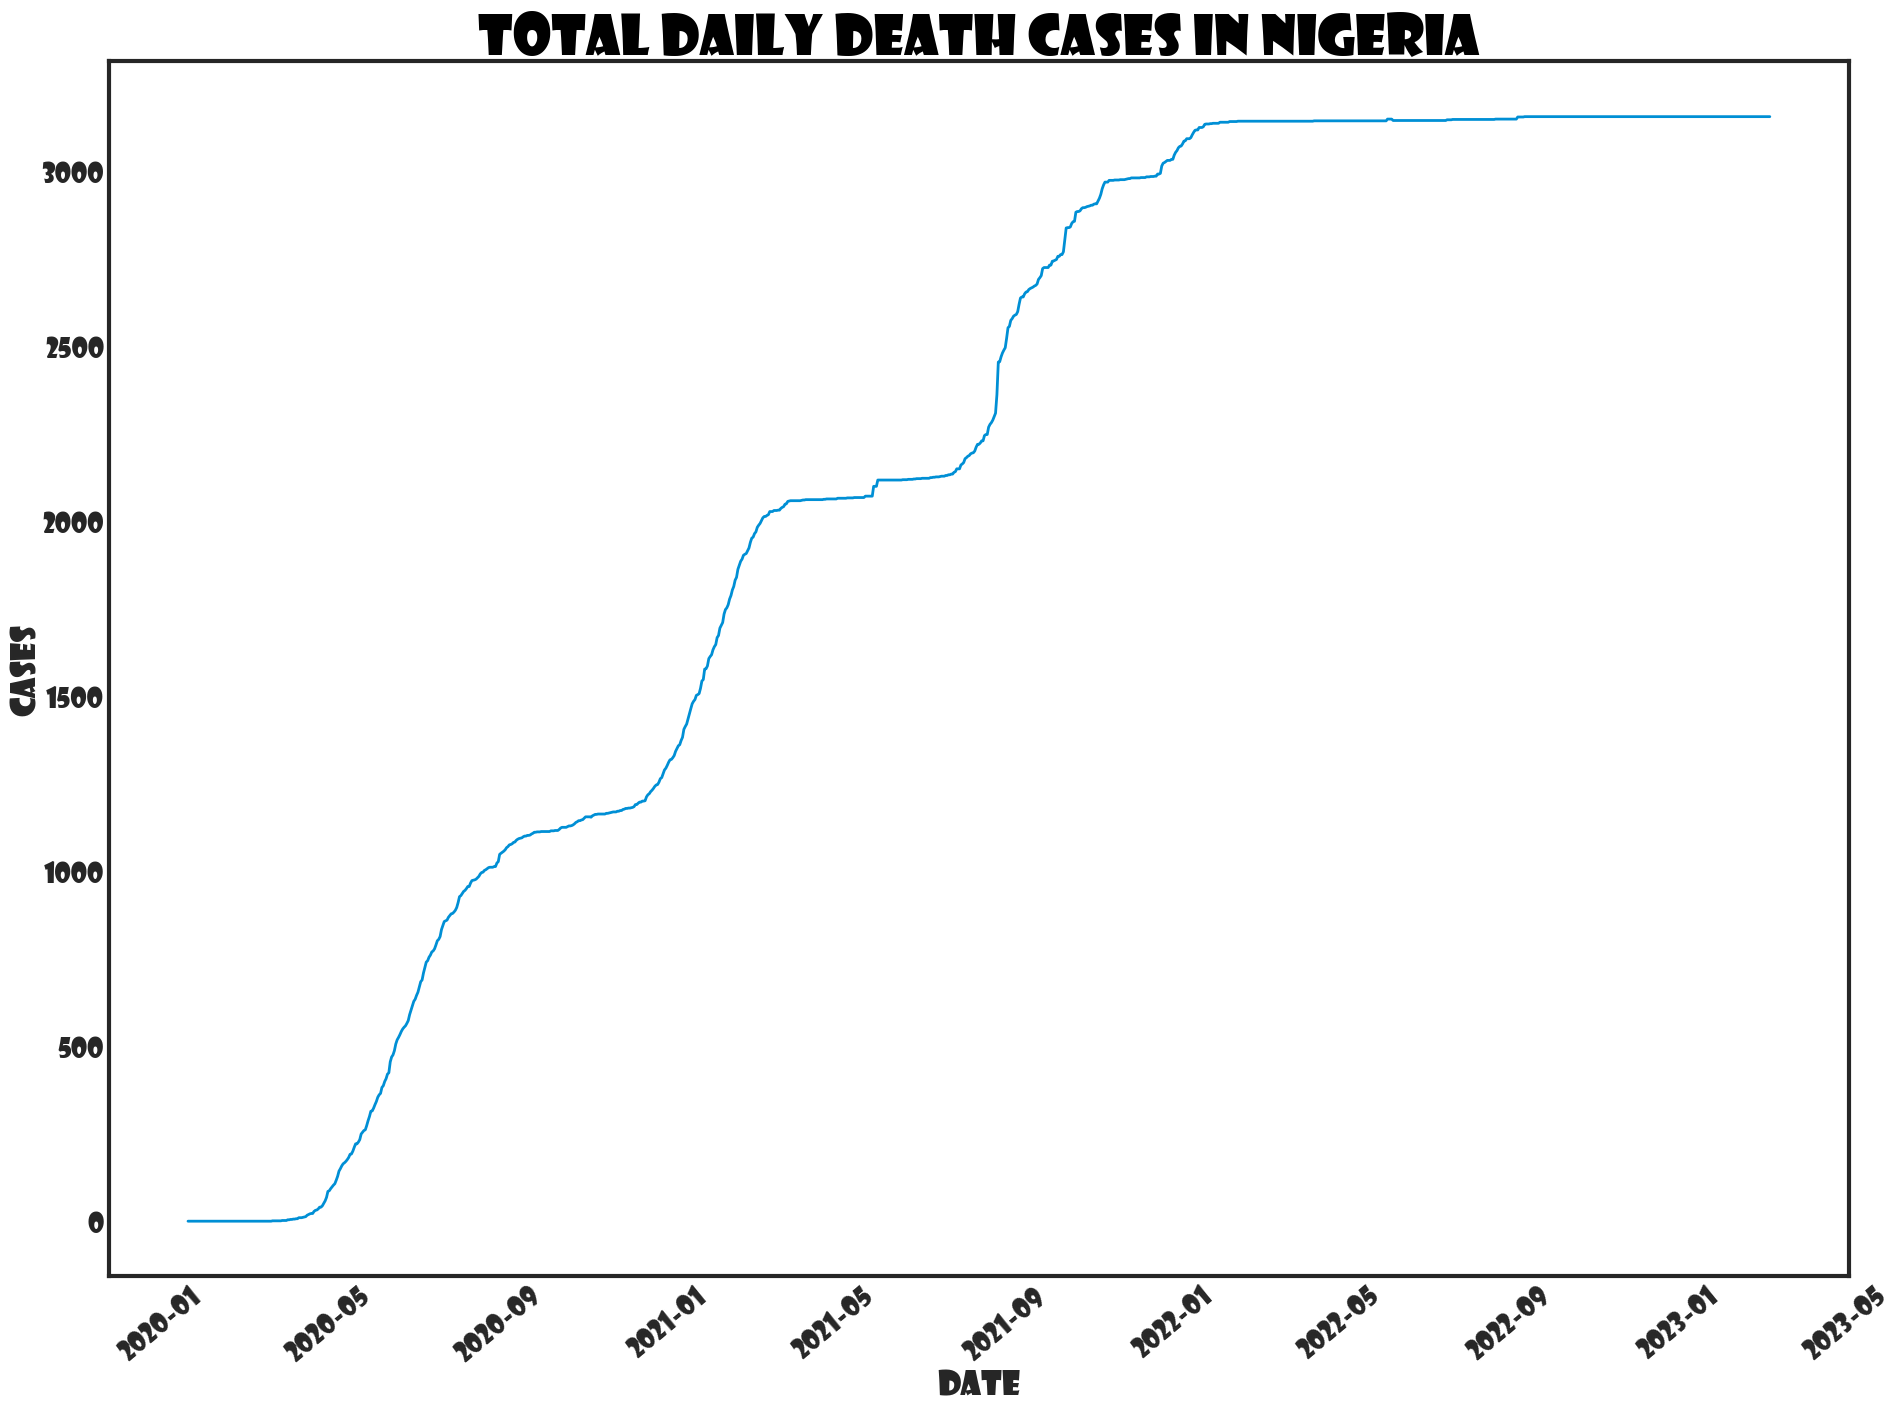

In [105]:
fig,ax=plt.subplots(figsize=(20,15))
sns.lineplot(x="Date", y="Cases", data=DEATH_NG, lw = 2)

rc('font', **{'family': 'Showcard Gothic',"size":20})
plt.xticks(rotation=40)
plt.title('Total Daily Death Cases in Nigeria',fontsize = '40', color = 'black')
plt.show()

In [97]:
DEATH_DAILY.head(10)

,Date,Cases
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
5,2020-01-27,0.0
6,2020-01-28,0.0
7,2020-01-29,0.0
8,2020-01-30,0.0
9,2020-01-31,0.0


In [98]:
NGGT = NGGT.replace(-165208.0, 0)

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

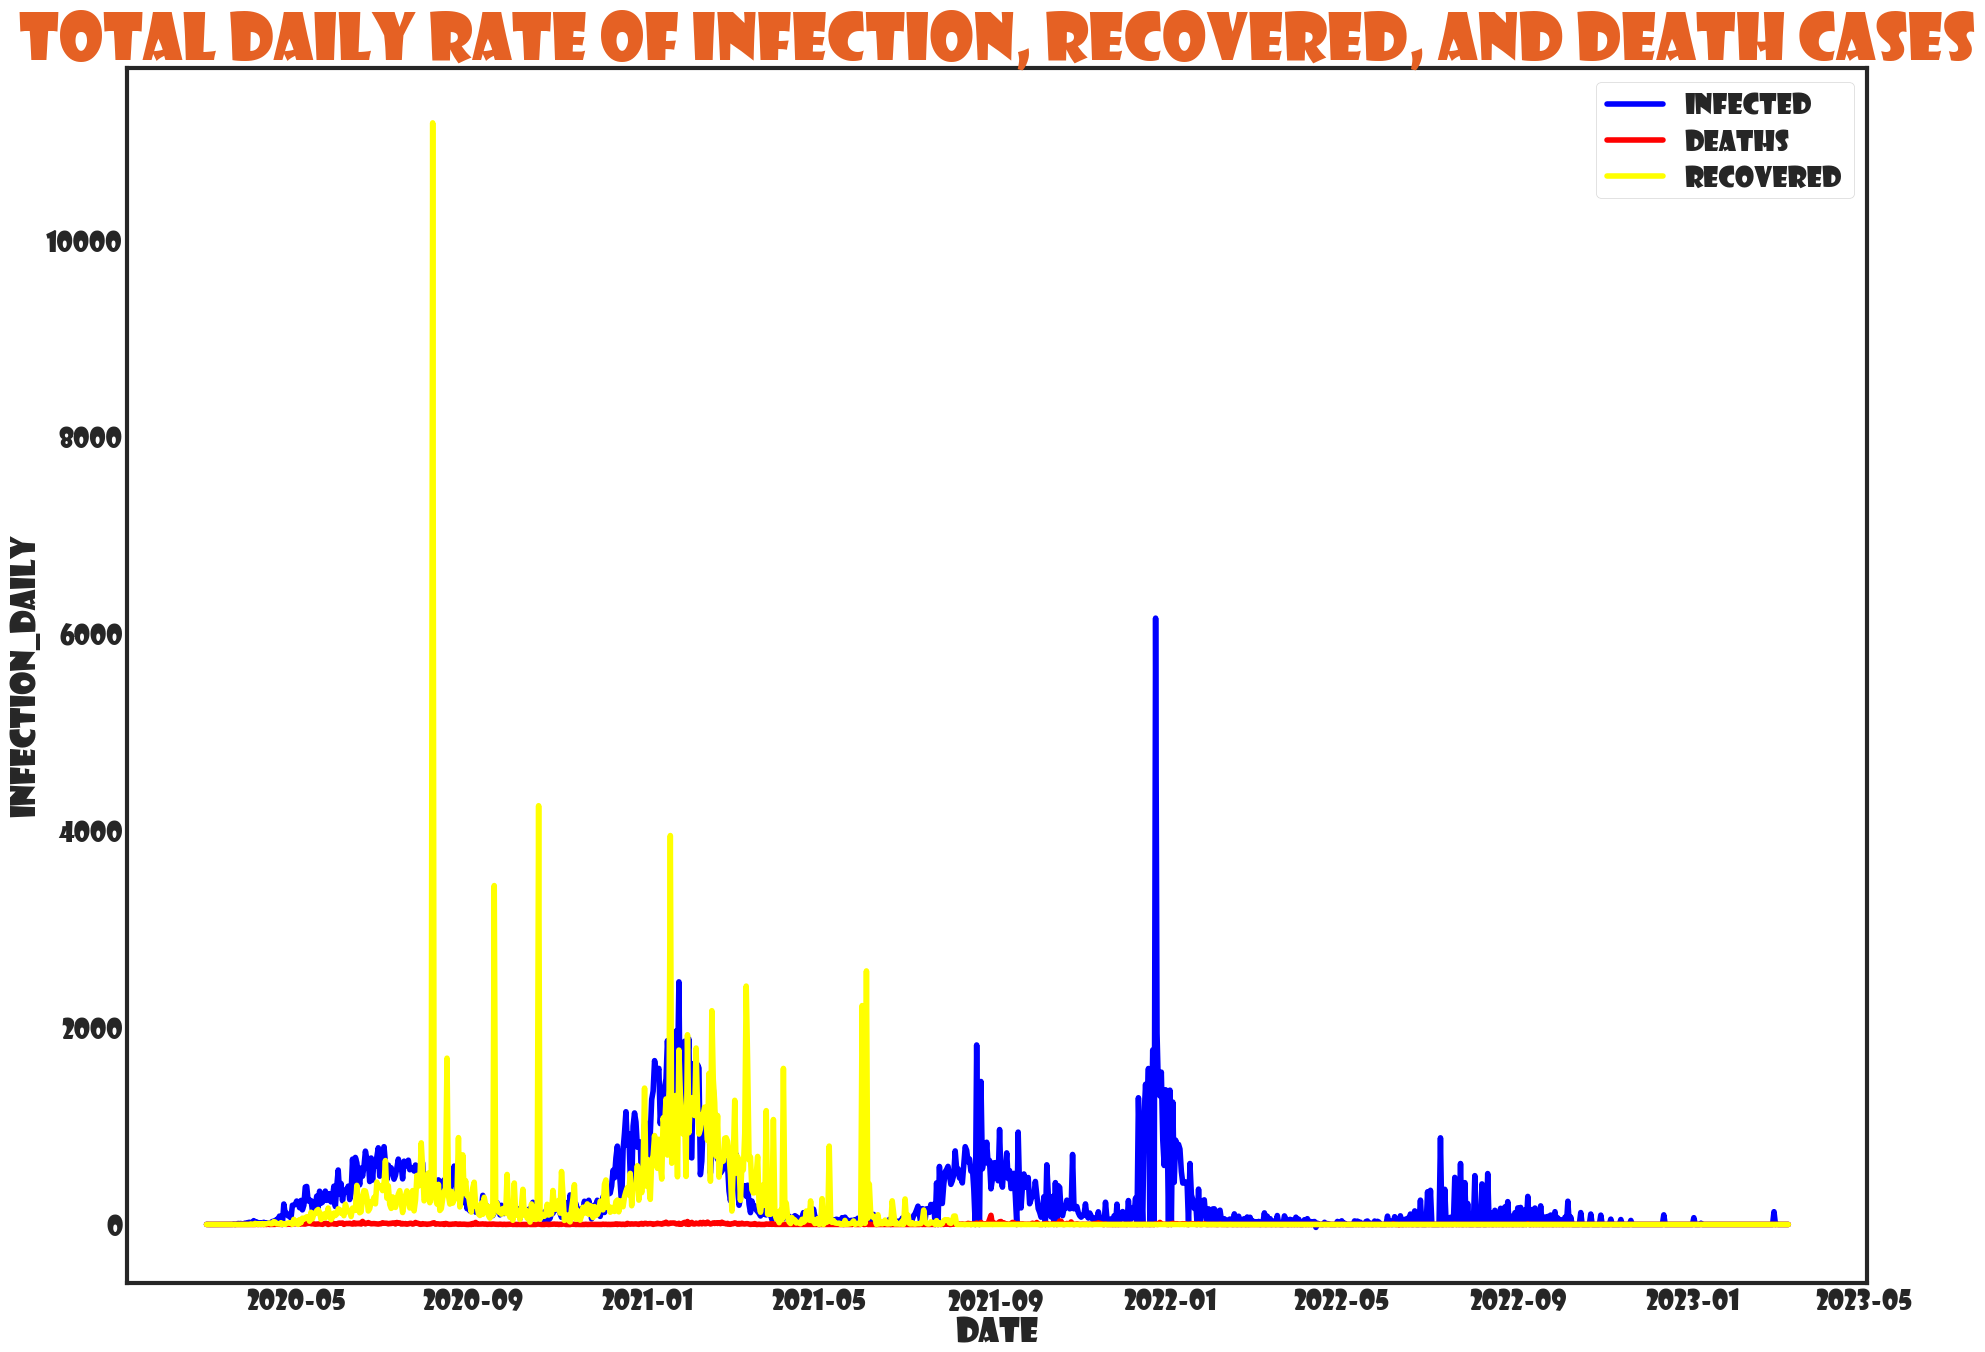

In [104]:
from matplotlib import rcParams
rc('font', **{'family': 'Showcard Gothic',"size":20})
#sns.set_style(style = "white")
fig,ax=plt.subplots(figsize=(20,15))
plt.title(label= "TOTAL DAILY RATE OF INFECTION, RECOVERED, AND DEATH CASES", fontsize=46, color="#E56124")
sns.lineplot(x='DATE', y='INFECTION_DAILY', data=NGGT, ax=ax, label='Infected', color='blue')
sns.lineplot(x='DATE', y='DEATH_DAILY', data=NGGT, ax=ax, label='Deaths', color='red')
sns.lineplot(x='DATE', y='RECOVERED_DAILY', data=NGGT, ax=ax, label='Recovered', color='yellow')
sns.despine

### The plot above shows the rate of infection, confirmed and death. Can be observed that at around september 2021, the recovered rate becomes zero as well as death cases. However, there are still some waves of recorded infections after that. Again this might be due to poor record keeping. 

## F-Determine the daily infection rate, you can use the Pandas diff method to find the derivate of the total cases.
Generate a line plot for the above

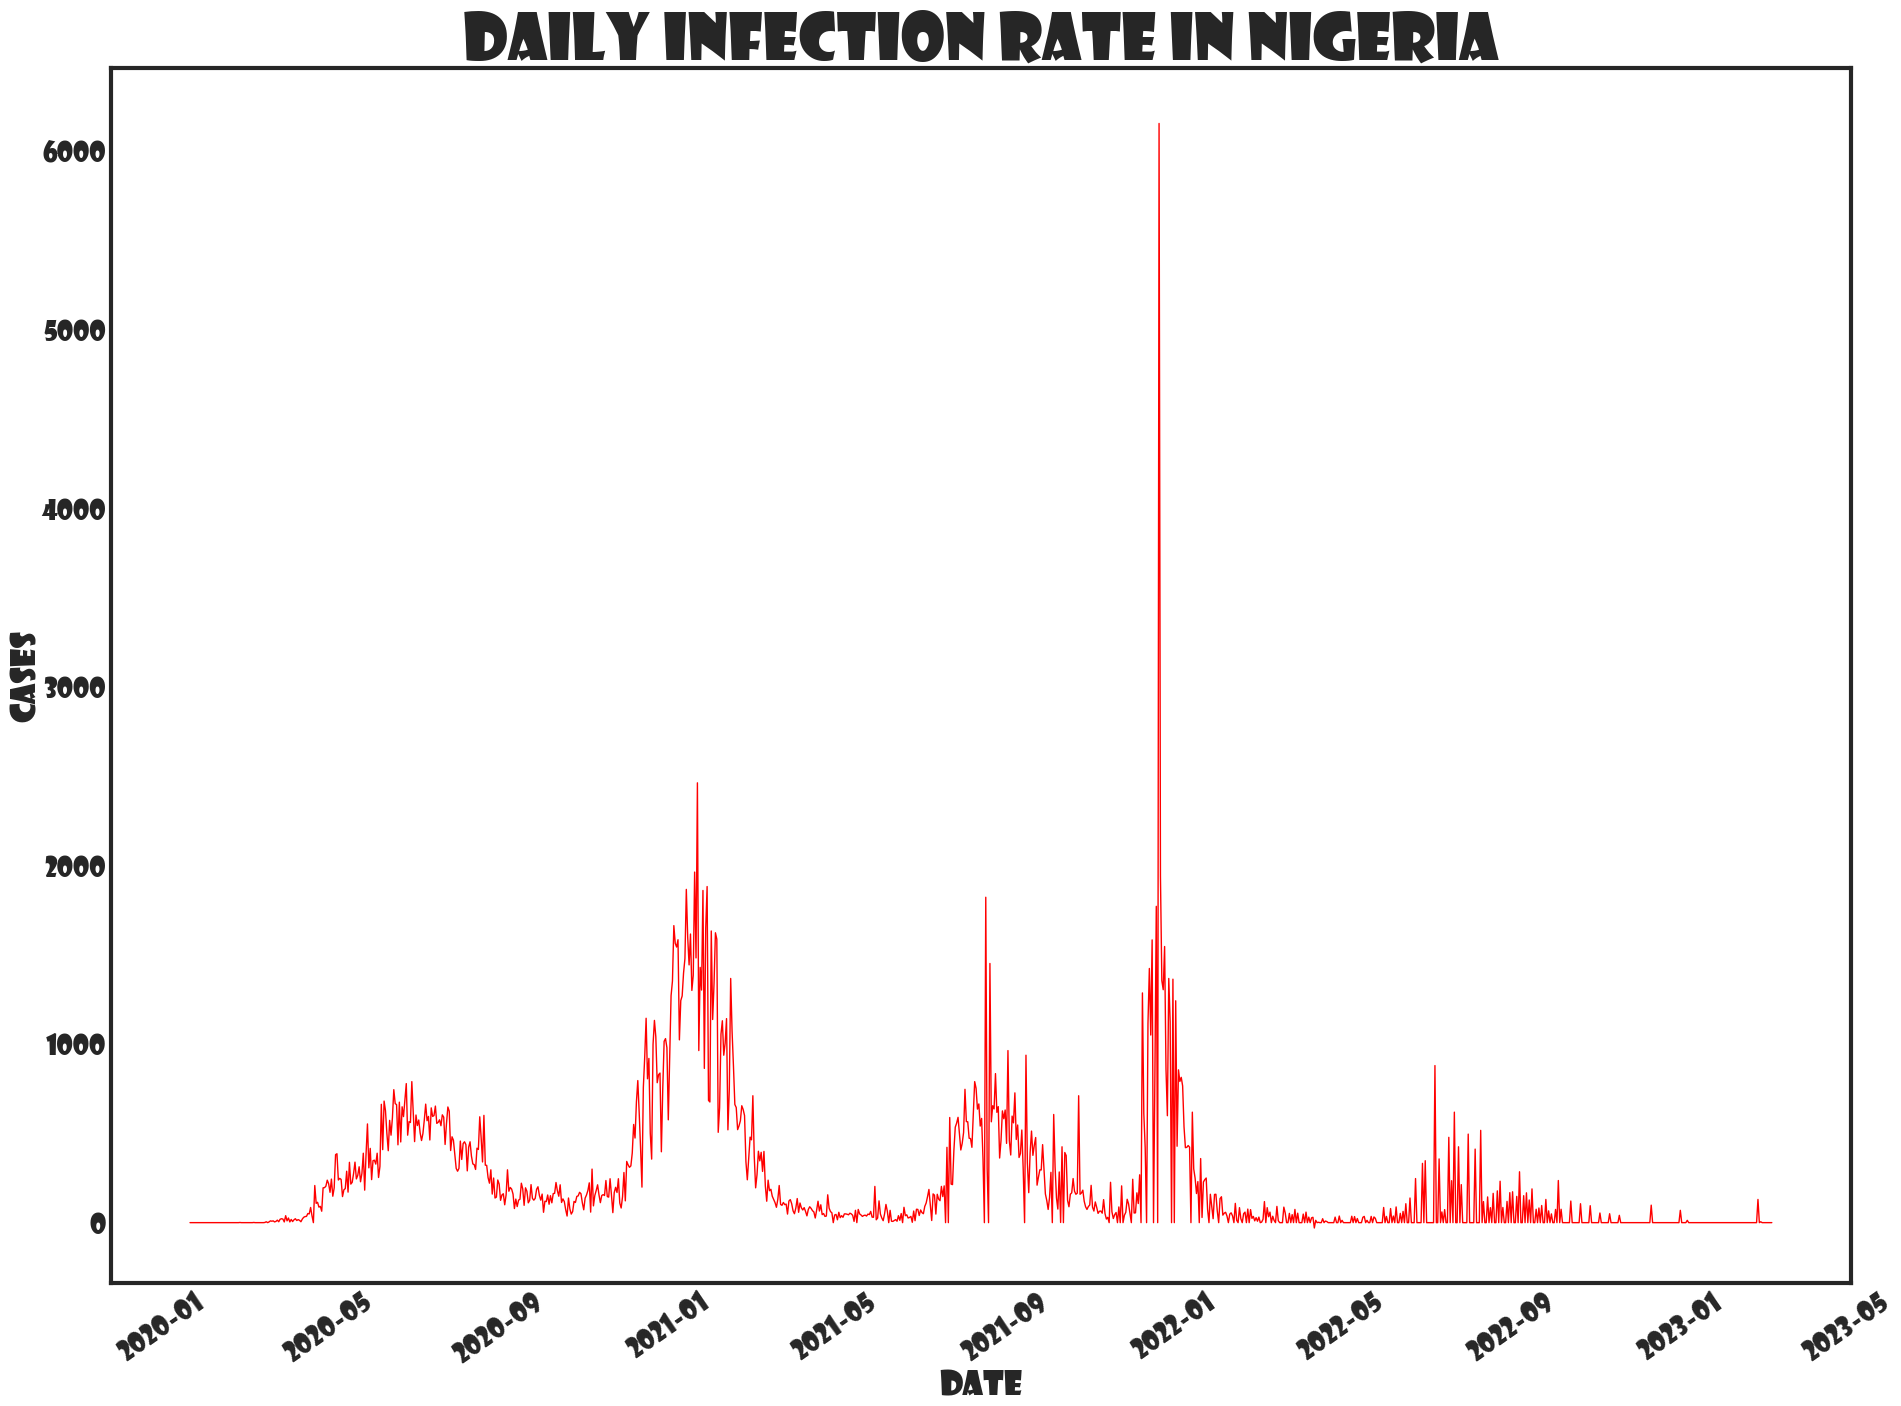

In [102]:

#sns.set_style(style = "white")
fig,ax=plt.subplots(figsize=(20,15))
sns.lineplot(x="Date", y="Cases", data=INFECTION_DAILY, lw = 1, color = "red")

rc('font', **{'family': 'Showcard Gothic',"size":20})
plt.xticks(rotation=35)
plt.title('Daily infection rate in Nigeria', fontsize = '46')
plt.show()

### Started getting infection cases in Nigeria around February 2020 which was the first wave in the country,  a decline in rate of  cases was noticed around september. The second wave hit in January 2021 which was twice as the cases recorded during the first wave.
### There was a short period of decline in cases and was another peak in January 2022, afterwards there was a large decline in reported cases.

In [100]:
DEATH_DAILY.head(10)

,Date,Cases
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
5,2020-01-27,0.0
6,2020-01-28,0.0
7,2020-01-29,0.0
8,2020-01-30,0.0
9,2020-01-31,0.0


In [101]:
INFECTION_DAILY


,Date,Cases
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
...,...,...
1137,2023-03-04,0.0
1138,2023-03-05,0.0
1139,2023-03-06,0.0
1140,2023-03-07,0.0


# TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

INFECTION_DAILY.max()

In [106]:
DEATH_DAILY.max()

Date     2023-03-09 00:00:00
Cases                   93.0
dtype: object

## TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.

In [107]:
COVID_EXT


,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84
5,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91
6,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87
7,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
8,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83
9,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89


In [108]:
COVID_EXT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [109]:
COVIDNG

,STATES,LAB_CONFIRMED,ADMISSION,DISCHARGED,DEATHS
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


In [110]:
COVIDNG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   STATES         37 non-null     object
 1   LAB_CONFIRMED  37 non-null     int64 
 2   ADMISSION      37 non-null     int64 
 3   DISCHARGED     37 non-null     int64 
 4   DEATHS         37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


In [111]:
COVID_EXT = COVID_EXT.rename(columns = {'states' : 'STATES'})


In [112]:
COVID_EXT

,STATES,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84
5,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91
6,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87
7,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
8,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83
9,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89


In [113]:
MERGED_COVID = pd.merge(COVID_EXT, COVIDNG, on = 'STATES')



In [114]:
MERGED_COVID = MERGED_COVID.sort_values('LAB_CONFIRMED', ascending = False)

In [115]:
MERGED_COVID.head(10)

,STATES,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,LAB_CONFIRMED,ADMISSION,DISCHARGED,DEATHS
28,Lagos,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93,26708,2435,24037,236
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,9627,2840,6694,93
13,Kaduna,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86,4504,579,3877,48
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,4262,280,3948,34
29,Oyo,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06,3788,368,3374,46
24,Rivers,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00,3279,232,2987,60
23,Edo,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09,2768,52,2603,113
30,Ogun,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07,2382,174,2175,33
12,Kano,North West,14726000,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87,2032,198,1778,56
25,Delta,South South,6303000,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08,1843,57,1737,49


In [116]:
MERGED_COVID = MERGED_COVID.nlargest(10, 'LAB_CONFIRMED')
MERGED_COVID_NEW = MERGED_COVID['STATES'], MERGED_COVID['LAB_CONFIRMED'], MERGED_COVID['Overall CCVI Index']
header = ['STATES', 'LAB_CONFIRMED', 'Overall CCVI Index']
COVID_NEW = pd.concat(MERGED_COVID_NEW, axis = 1, keys = header)
COVID_NEW

,STATES,LAB_CONFIRMED,Overall CCVI Index
28,Lagos,26708,0.0
0,FCT,9627,0.3
13,Kaduna,4504,0.7
1,Plateau,4262,0.4
29,Oyo,3788,0.2
24,Rivers,3279,0.4
23,Edo,2768,0.1
30,Ogun,2382,0.3
12,Kano,2032,0.6
25,Delta,1843,0.4


In [117]:
with pd.ExcelWriter ('COVID_NEW.xlsx') as writer:
    COVID_NEW.to_excel(writer, sheet_name = 'Sheet_1')

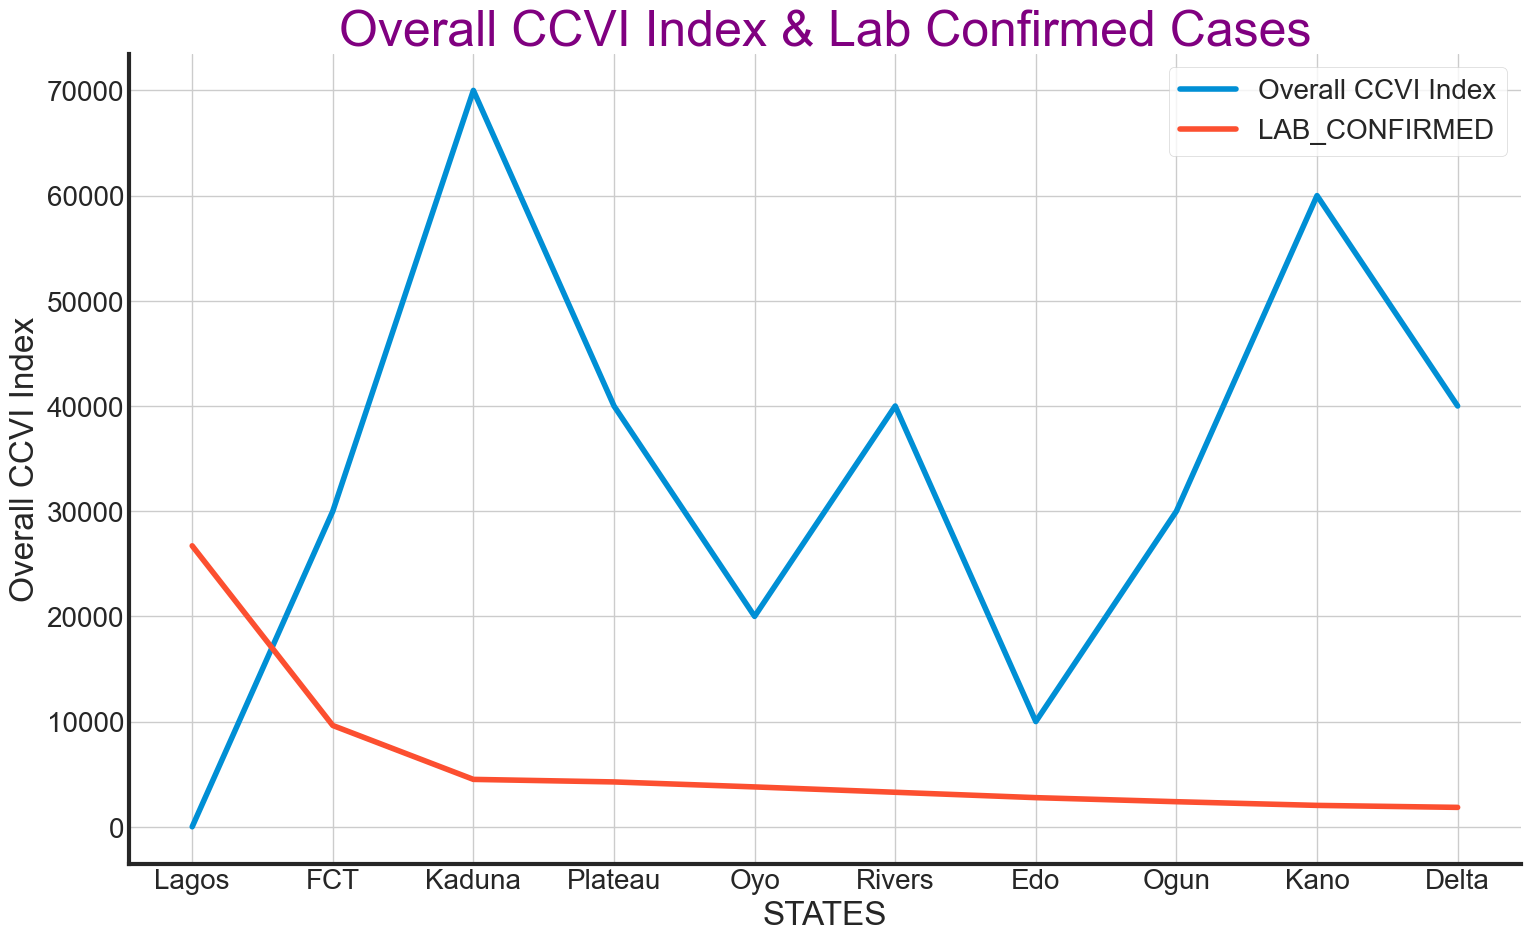

In [118]:
y = COVID_NEW['Overall CCVI Index']
x = COVID_NEW['STATES']
z = COVID_NEW['LAB_CONFIRMED']
rc('font', **{'family': 'Bahnschrift',"size":20})
sns.set_style(style = "white")
d = plt.figure(figsize = (16, 10))
plt.grid()
fii = sns.lineplot(x, 100000*y, data = COVID_NEW, sort = False)
plt.title(label = 'Overall CCVI Index & Lab Confirmed Cases', fontsize = 36, color = 'purple')
sns.lineplot(x, z, data = COVID_NEW, sort = False)
fii.legend(['Overall CCVI Index', 'LAB_CONFIRMED'])
sns.despine()

## TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset.

Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.

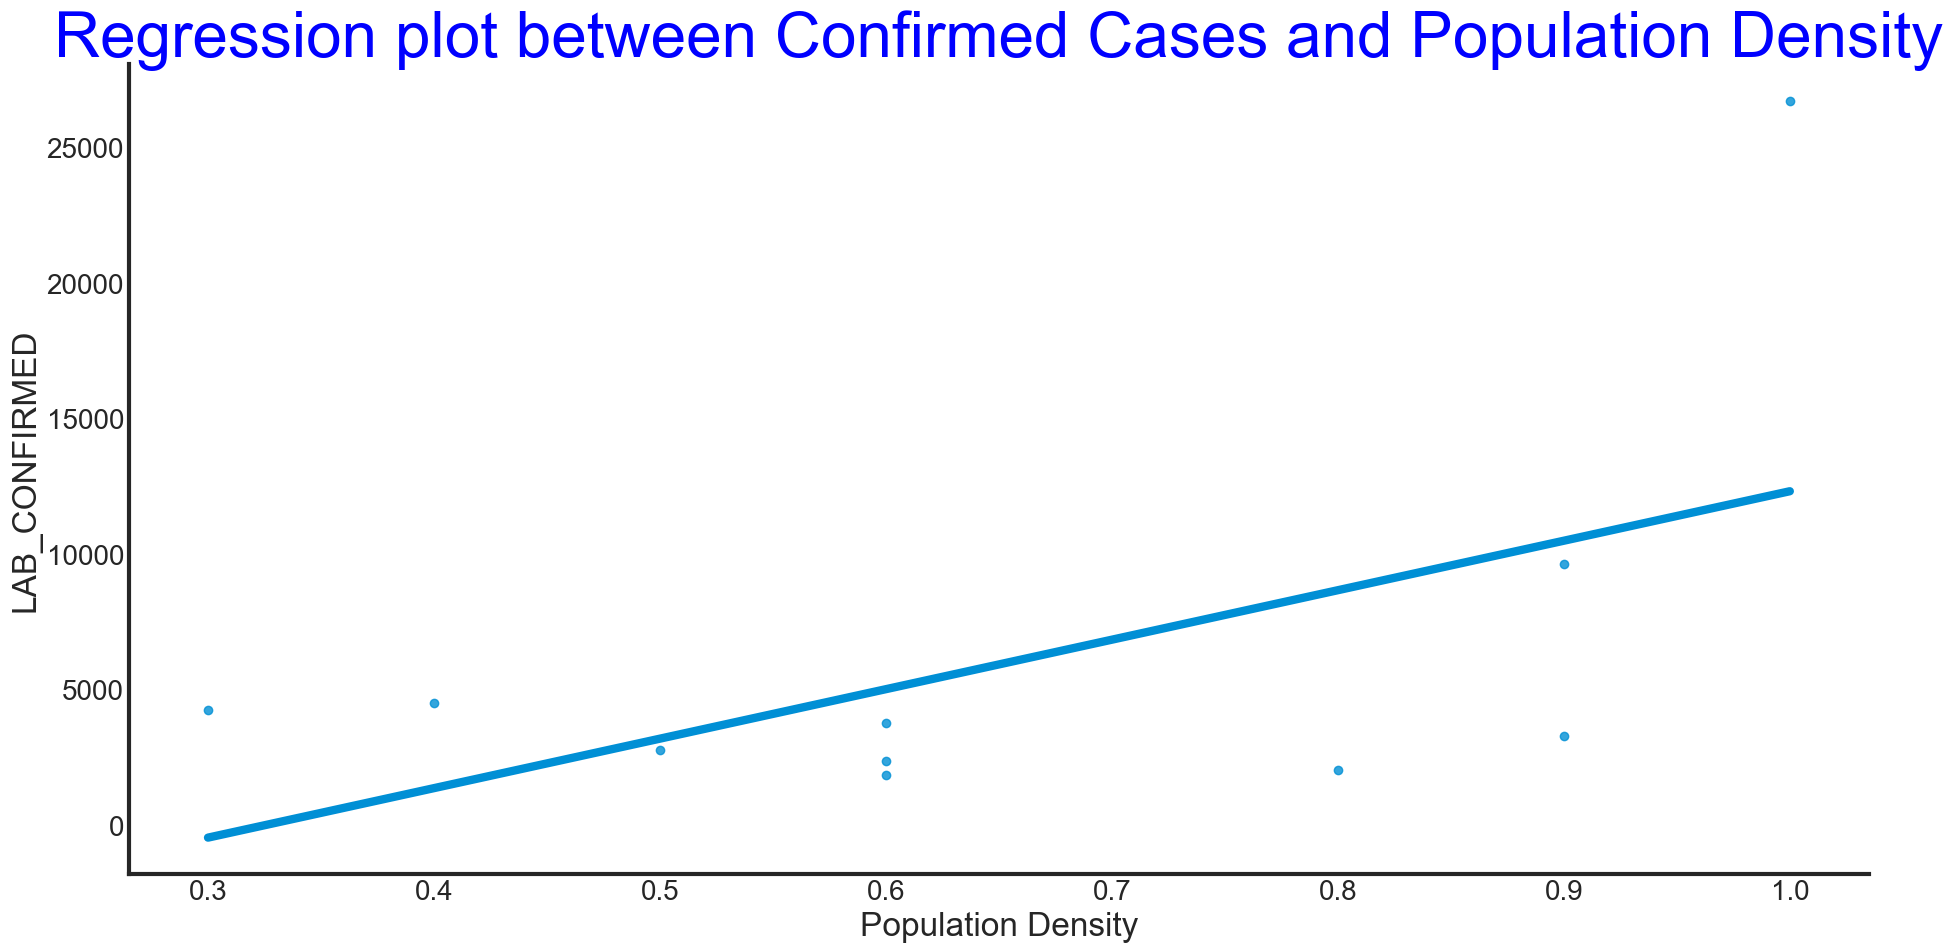

In [119]:
sns.set_style('white')
plt.figure(figsize = (20, 10))
plt.title(label = 'Regression plot between Confirmed Cases and Population Density', fontsize = 46, color = 'blue')
sns.regplot( x= 'Population Density' , y= 'LAB_CONFIRMED', data = MERGED_COVID, ci = None )
sns.despine()

## There seems to be a positive relationship between the Population density and confirmed cases. Confirmed cases on the average, increases with population density. However, there might be some outliers which might be as a result of some other factors other than population.

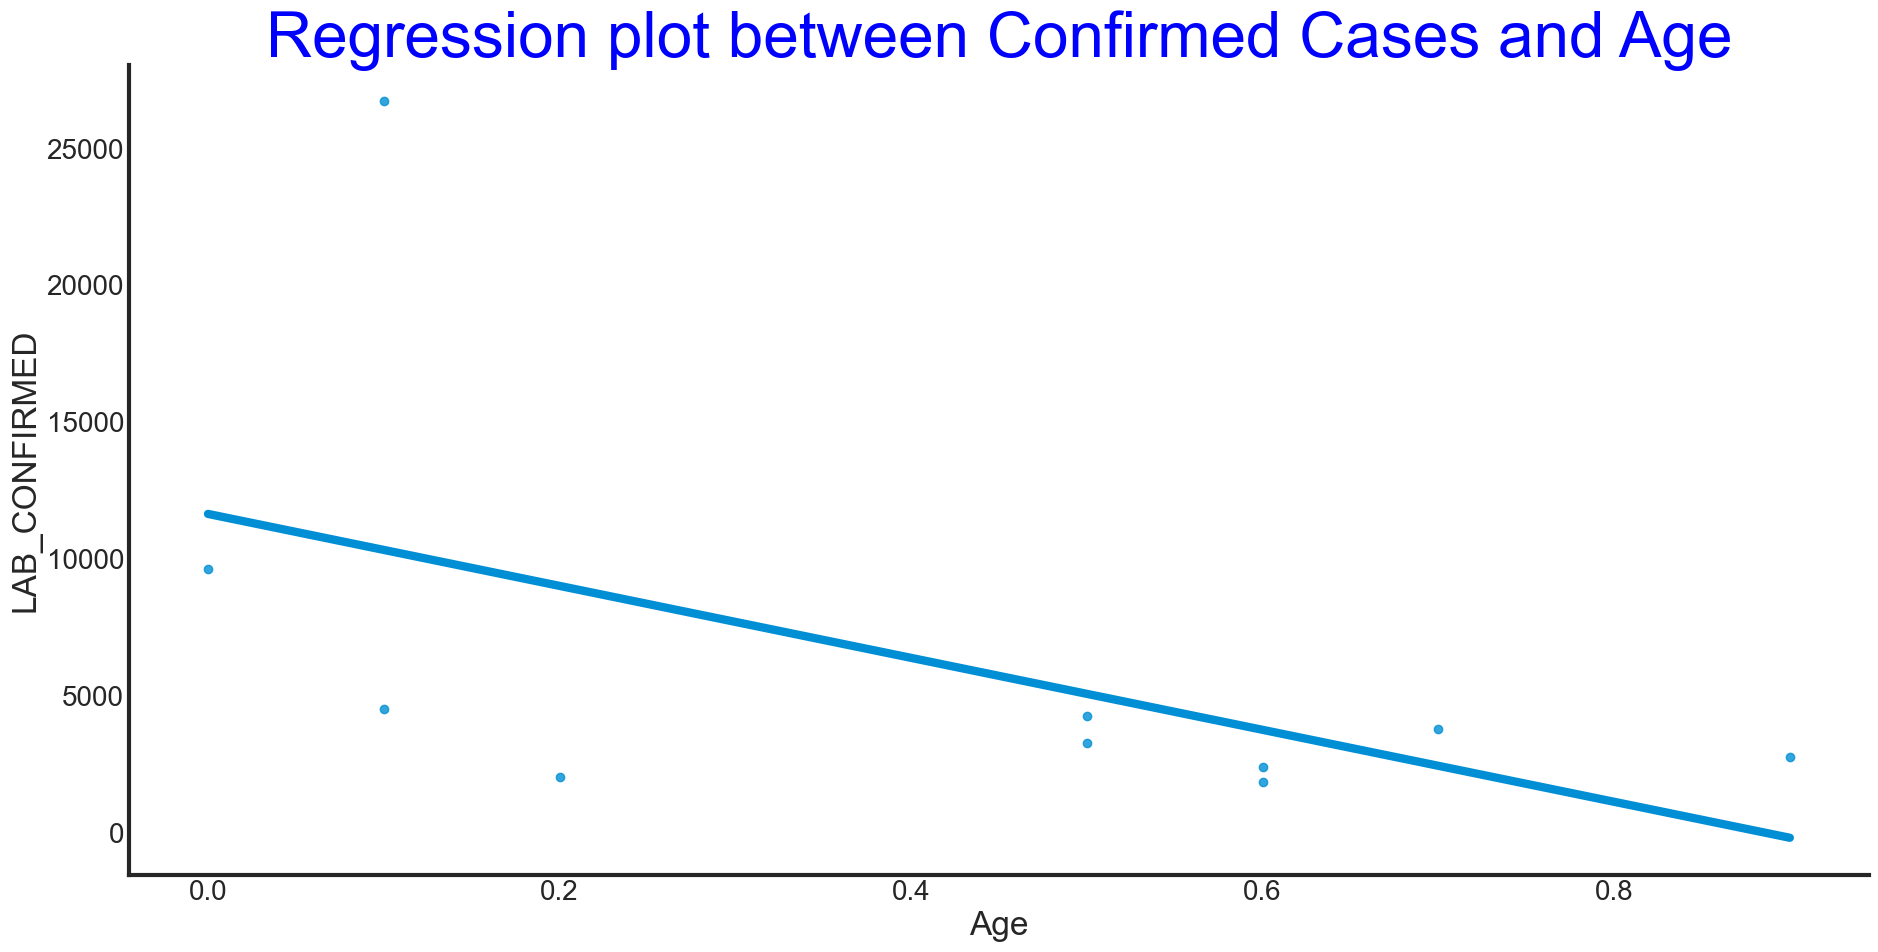

In [120]:
sns.set_style('white')
plt.figure(figsize = (20, 10))
plt.title(label = 'Regression plot between Confirmed Cases and Age', fontsize = 46, color = 'blue')
sns.regplot( x= 'Age' , y= 'LAB_CONFIRMED', data = MERGED_COVID, ci = None )
sns.despine()

## Low Age index score results to more confirmed cases and vice versa. Age index score has a  negative corellation to confirmed cases.

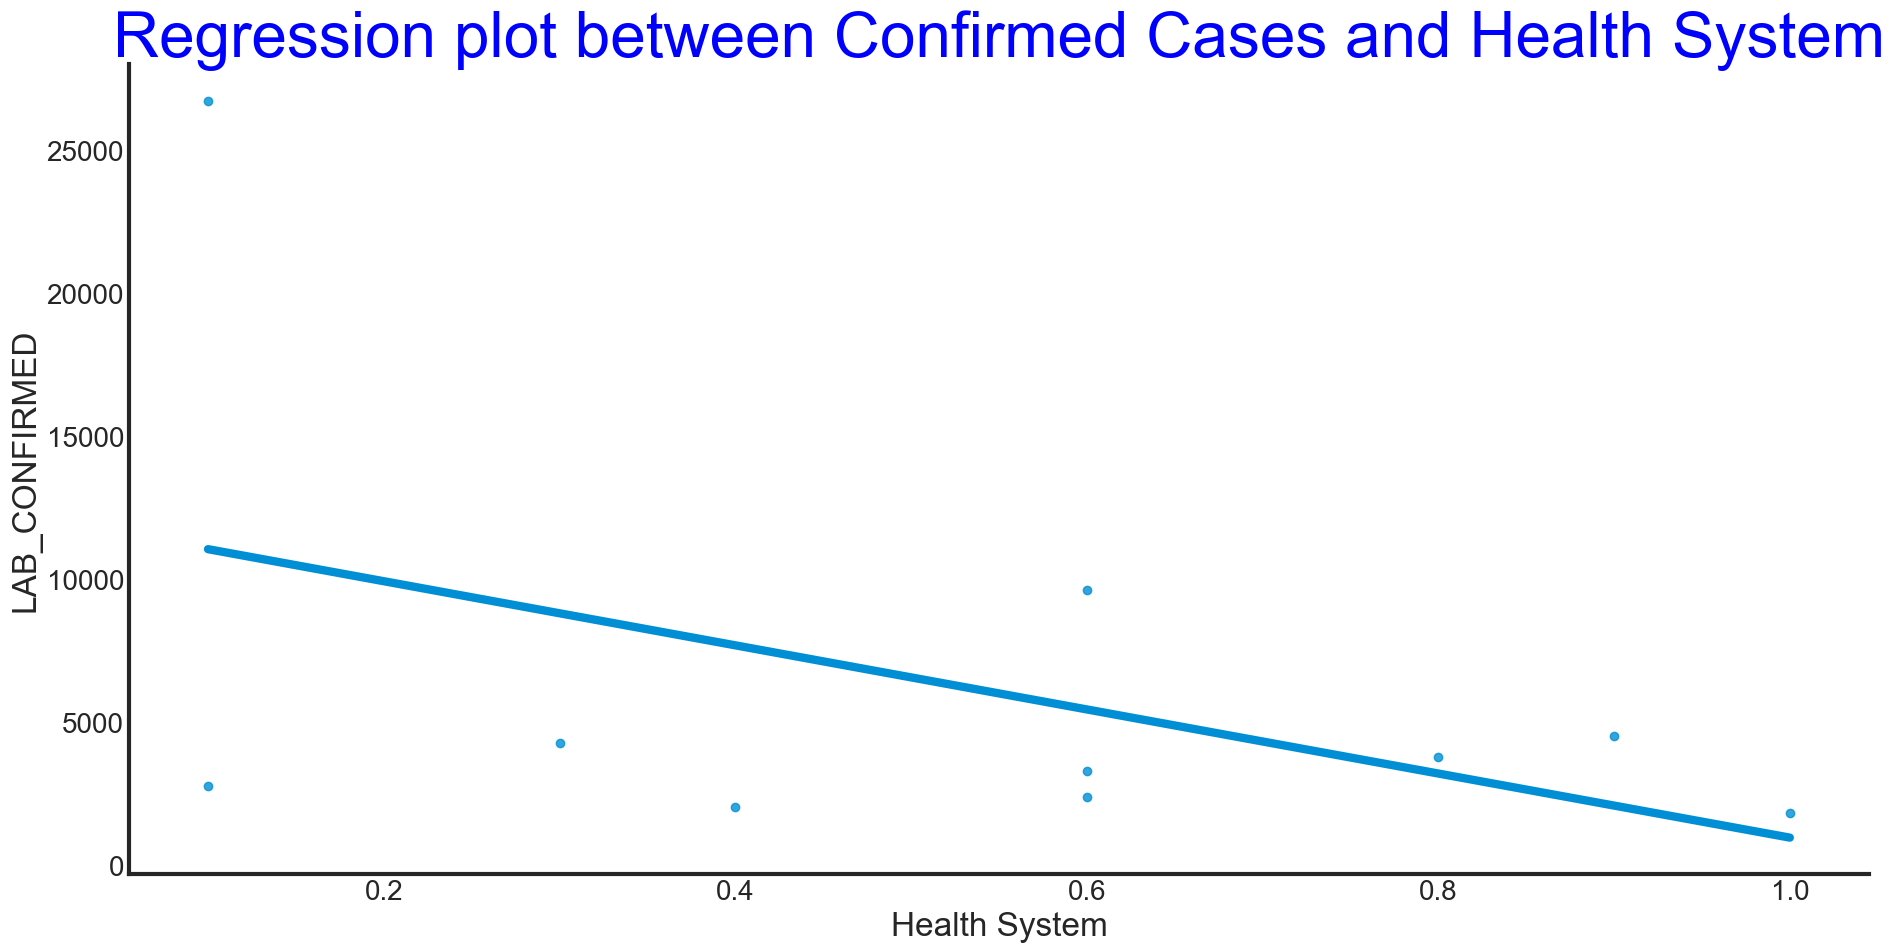

In [121]:
sns.set_style('white')
plt.figure(figsize = (20, 10))
plt.title(label = 'Regression plot between Confirmed Cases and Health System', fontsize = 46, color = 'blue')
sns.regplot( x= 'Health System' , y= 'LAB_CONFIRMED', data = MERGED_COVID, ci = None )
sns.despine()

### TODO J -

In [126]:
MERGED_COVID = MERGED_COVID.nlargest(10, 'LAB_CONFIRMED')
MERGED_COVID_NEW = MERGED_COVID['STATES'], MERGED_COVID['LAB_CONFIRMED'], MERGED_COVID['Fragility']
header = ['STATES', 'LAB_CONFIRMED', 'Fragility']
COVID_H = pd.concat(MERGED_COVID_NEW, axis = 1, keys = header)
COVID_H

,STATES,LAB_CONFIRMED,Fragility
28,Lagos,26708,0.3
0,FCT,9627,0.4
13,Kaduna,4504,0.8
1,Plateau,4262,0.8
29,Oyo,3788,0.2
24,Rivers,3279,0.6
23,Edo,2768,0.1
30,Ogun,2382,0.5
12,Kano,2032,0.3
25,Delta,1843,0.2


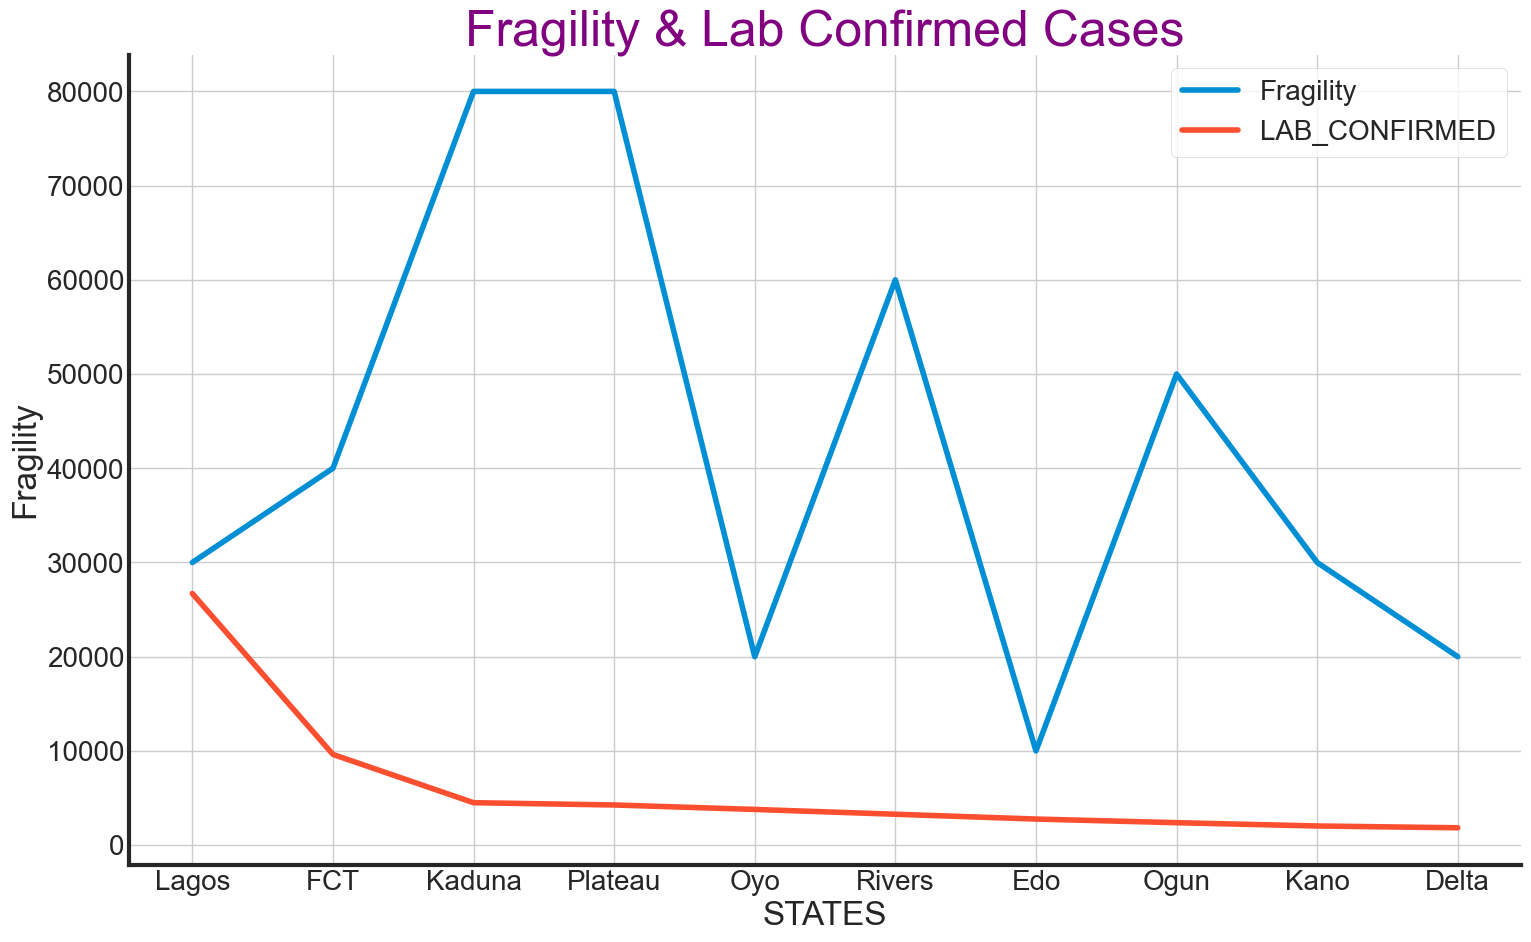

In [127]:
y = COVID_H['Fragility']
x = COVID_H['STATES']
z = COVID_H['LAB_CONFIRMED']
rc('font', **{'family': 'Bahnschrift',"size":20})
sns.set_style(style = "white")
d = plt.figure(figsize = (16, 10))
plt.grid()
fii = sns.lineplot(x, 100000*y, data = COVID_H, sort = False)
plt.title(label = 'Fragility & Lab Confirmed Cases', fontsize = 36, color = 'purple')
sns.lineplot(x, z, data = COVID_H, sort = False)
fii.legend(['Fragility', 'LAB_CONFIRMED'])
sns.despine()

## Even though fragility in lagos is relatively low,confirmed cases in Lagos is still the highest there no practical corellation  between these two factors. Some other factors might have influenced high confirmed cased in Lagos e.g High Population

In [128]:
REAL_GDP

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [129]:
BUDG_DAT

,states,Initial_budget (Bn),Revised_budget (Bn),CHANGE_BUDG (Bn),CHANGE_BDGPERC
0,Abia,136.60,102.70,33.90,24.816984
1,Adamawa,183.30,139.31,43.99,23.998909
2,Akwa-Ibom,597.73,366.00,231.73,38.768340
3,Anambra,137.10,112.80,24.30,17.724289
4,Bauchi,167.20,128.00,39.20,23.444976
5,Bayelsa,242.18,183.15,59.03,24.374432
6,Benue,189.00,119.00,70.00,37.037037
7,Borno,146.80,108.80,38.00,25.885559
8,Cross River,1100.00,147.10,952.90,86.627273
9,Delta,395.50,282.30,113.20,28.621997


In [130]:
MELTED_GDP = REAL_GDP.melt(id_vars ="Year")


In [131]:
MELTED_GDP

,Year,variable,value
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41


## TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

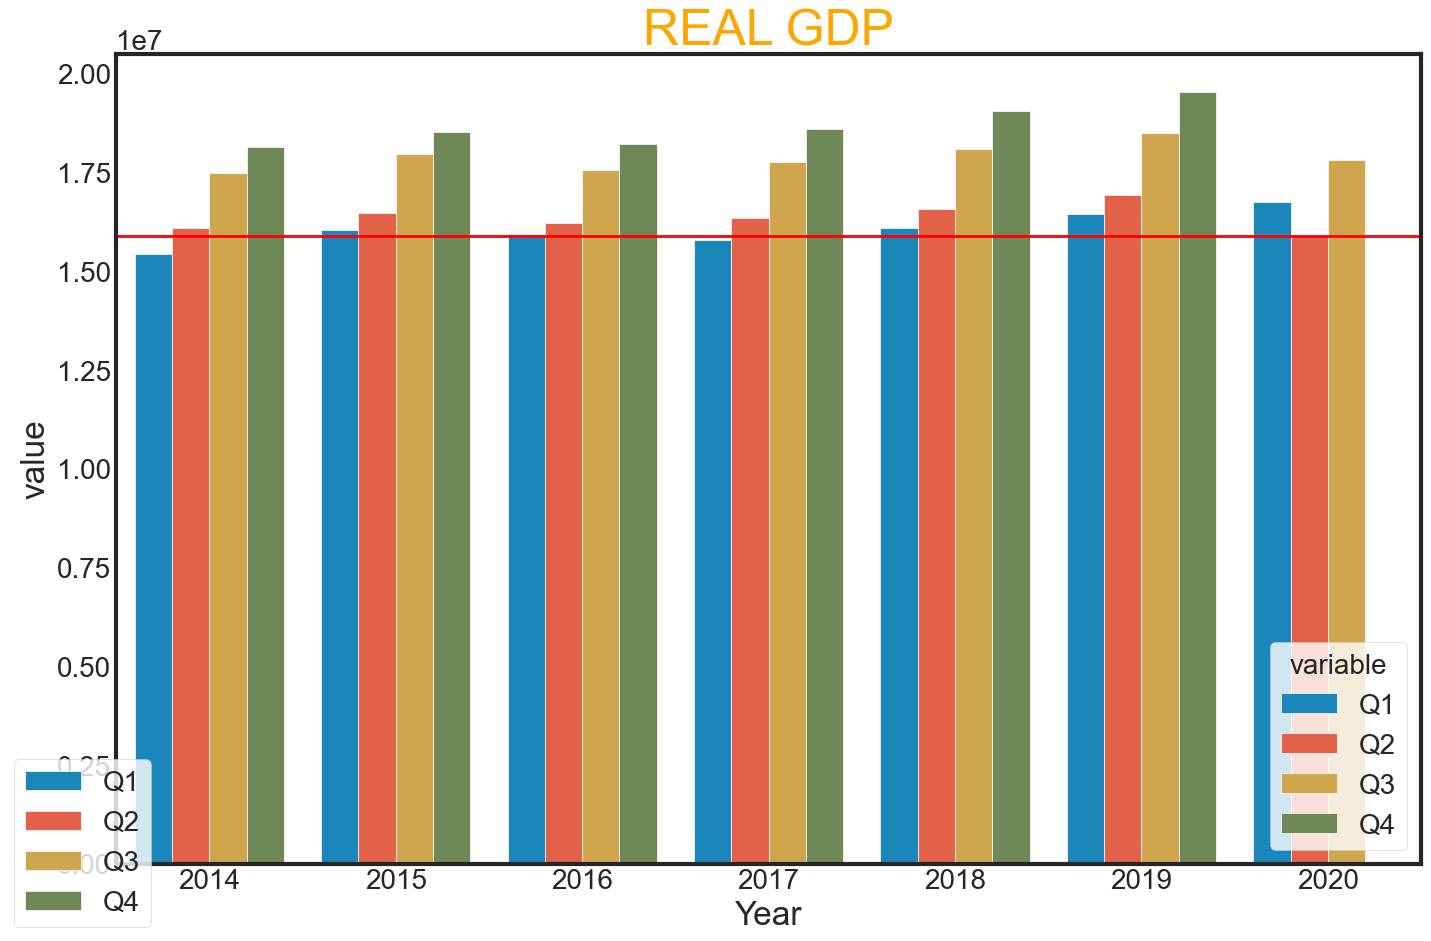

In [132]:
sns.set_style("white")
d = plt.figure(figsize=(15,10))
graph = sns.barplot(data = MELTED_GDP, x = "Year", y = "value", hue = "variable")
plt.title(label="REAL GDP", fontsize=36, color="Orange")
graph.axhline(y = 15890000.00, linewidth = 2, color = "r")
#plt.grid()
d.legend(loc="lower left")
plt.show()

## Concentrating on Q2,the value of real GDP was most reduced in 2020, although the there was a gradual increase from 2014, the value dropped to the lowest in 2020

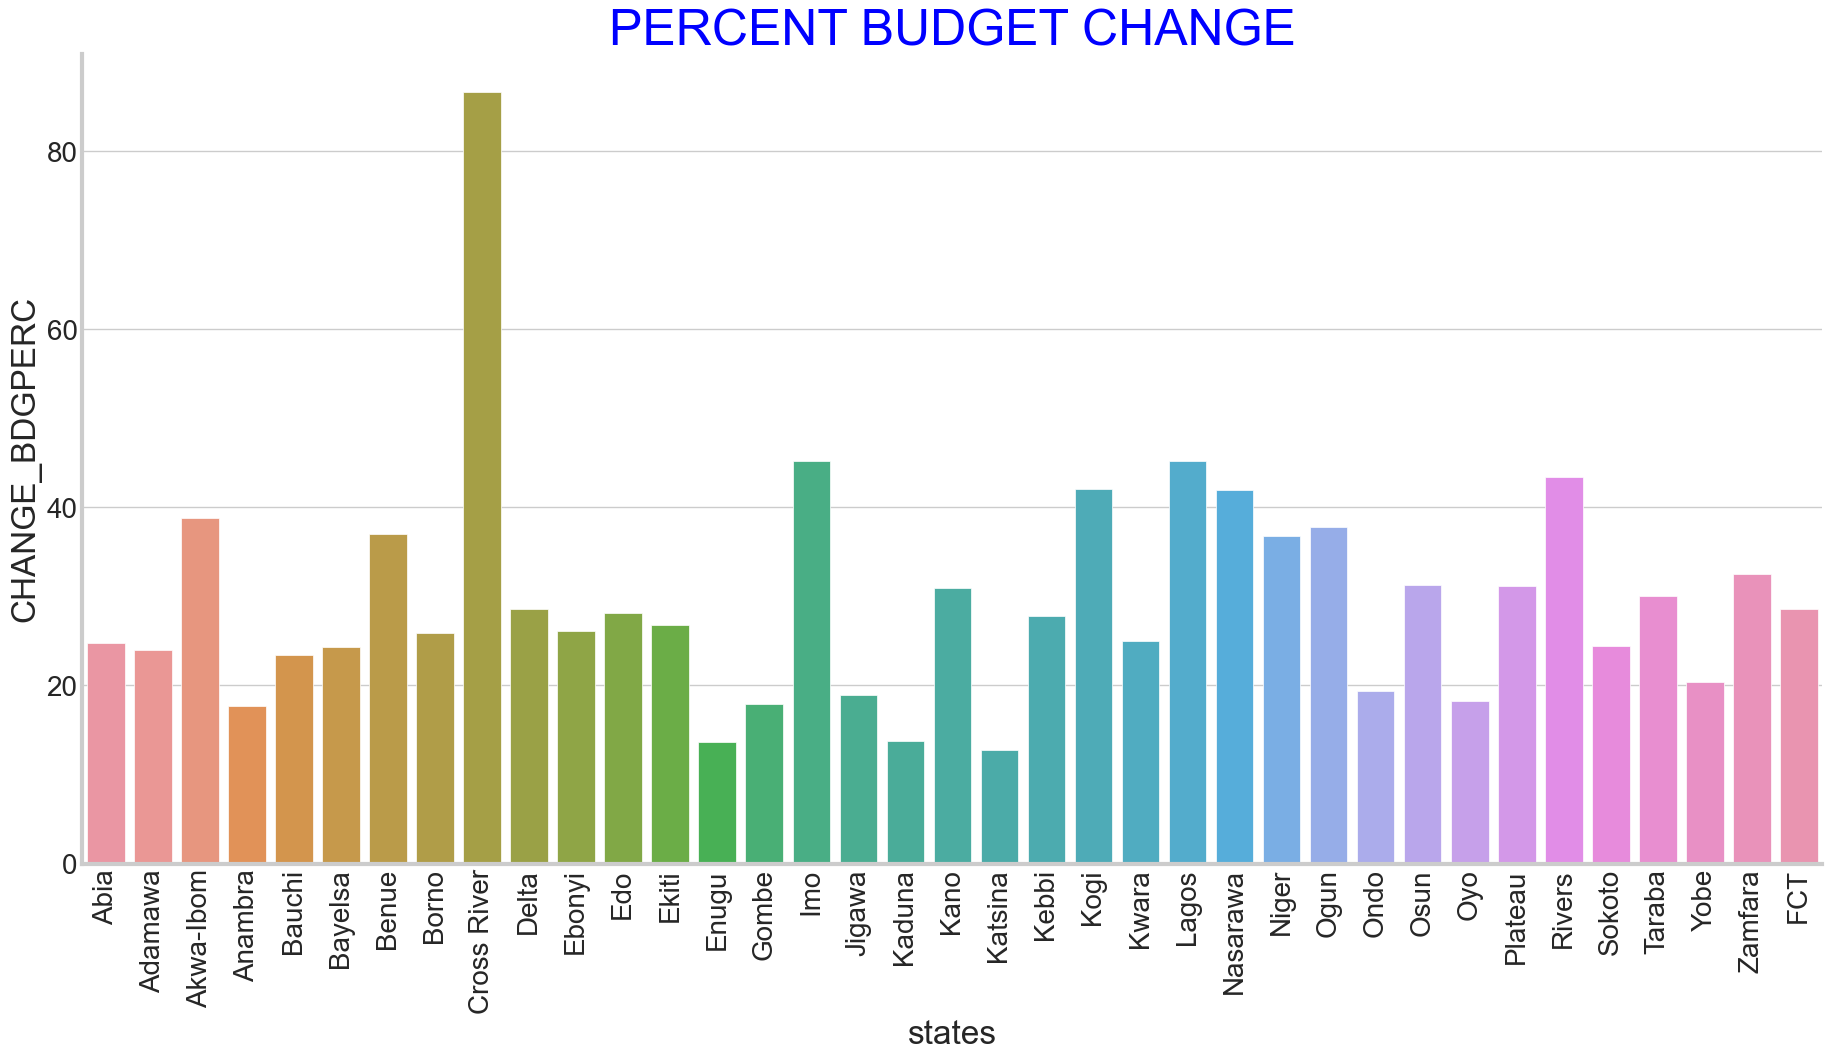

In [133]:
sns.set_style(style="whitegrid")

plt.figure(figsize=(20,10))
ax = sns.barplot(x="states", y="CHANGE_BDGPERC", data= BUDG_DAT)
plt.title(label= "PERCENT BUDGET CHANGE", fontsize=36, color="blue")
plt.xticks(rotation = 90)
sns.despine()

## Cross river has the higest percentage budget change